In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('C:/Users/debas/OneDrive/Desktop/output.csv')

C:\Users\debas\AppData\Local\Temp\ipykernel_34216\949050126.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/debas/OneDrive/Desktop/output.csv')


In [3]:
df.head()

,service_id,asset_code,site,system_type,device_id,device_ip,object_name,equipment_name,equipment_id,data_received_on,datapoint,monitoring_data,service_status,subsystem,system_id
0,FIR-FCU-01On/Off Cmd,FIR-FCU-01,First Floor,FCU,170101,192.168.170.101,First Floor\\FCU-1F-02 On/Off Cmd,FCU-1F-02,FCU-1F-02,2025-08-21T08:11:48.133 UTC,On/Off Cmd,active,normal,-,-
1,FIR-FCU-01On/Off Cmd,FIR-FCU-01,First Floor,FCU,170101,192.168.170.101,First Floor\\FCU-1F-02 On/Off Cmd,FCU-1F-02,FCU-1F-02,2025-08-21T08:08:47.990 UTC,On/Off Cmd,active,normal,-,-
2,FIR-FCU-01On/Off Cmd,FIR-FCU-01,First Floor,FCU,170101,192.168.170.101,First Floor\\FCU-1F-02 On/Off Cmd,FCU-1F-02,FCU-1F-02,2025-08-21T08:05:48.796 UTC,On/Off Cmd,active,normal,-,-
3,FIR-FCU-01On/Off Cmd,FIR-FCU-01,First Floor,FCU,170101,192.168.170.101,First Floor\\FCU-1F-02 On/Off Cmd,FCU-1F-02,FCU-1F-02,2025-08-21T08:02:48.708 UTC,On/Off Cmd,active,normal,-,-
4,FIR-FCU-01On/Off Cmd,FIR-FCU-01,First Floor,FCU,170101,192.168.170.101,First Floor\\FCU-1F-02 On/Off Cmd,FCU-1F-02,FCU-1F-02,2025-08-21T07:59:48.964 UTC,On/Off Cmd,active,normal,-,-


In [4]:
df['data_received_on'] = pd.to_datetime(df['data_received_on'])

In [5]:
df.head()

,service_id,asset_code,site,system_type,device_id,device_ip,object_name,equipment_name,equipment_id,data_received_on,datapoint,monitoring_data,service_status,subsystem,system_id
0,FIR-FCU-01On/Off Cmd,FIR-FCU-01,First Floor,FCU,170101,192.168.170.101,First Floor\\FCU-1F-02 On/Off Cmd,FCU-1F-02,FCU-1F-02,2025-08-21 08:11:48.133000+00:00,On/Off Cmd,active,normal,-,-
1,FIR-FCU-01On/Off Cmd,FIR-FCU-01,First Floor,FCU,170101,192.168.170.101,First Floor\\FCU-1F-02 On/Off Cmd,FCU-1F-02,FCU-1F-02,2025-08-21 08:08:47.990000+00:00,On/Off Cmd,active,normal,-,-
2,FIR-FCU-01On/Off Cmd,FIR-FCU-01,First Floor,FCU,170101,192.168.170.101,First Floor\\FCU-1F-02 On/Off Cmd,FCU-1F-02,FCU-1F-02,2025-08-21 08:05:48.796000+00:00,On/Off Cmd,active,normal,-,-
3,FIR-FCU-01On/Off Cmd,FIR-FCU-01,First Floor,FCU,170101,192.168.170.101,First Floor\\FCU-1F-02 On/Off Cmd,FCU-1F-02,FCU-1F-02,2025-08-21 08:02:48.708000+00:00,On/Off Cmd,active,normal,-,-
4,FIR-FCU-01On/Off Cmd,FIR-FCU-01,First Floor,FCU,170101,192.168.170.101,First Floor\\FCU-1F-02 On/Off Cmd,FCU-1F-02,FCU-1F-02,2025-08-21 07:59:48.964000+00:00,On/Off Cmd,active,normal,-,-


In [9]:
df['data_received_on_naive'] = df['data_received_on'].dt.tz_localize(None)

In [10]:
df.set_index('data_received_on_naive', inplace=True)

In [8]:
df.sort_index().head(25)

,service_id,asset_code,site,system_type,device_id,device_ip,object_name,equipment_name,equipment_id,data_received_on,datapoint,monitoring_data,service_status,subsystem,system_id
data_received_on_naive,,,,,,,,,,,,,,,
2025-05-23 12:48:23.495,BAS-SEF-01on off cmd,BAS-SEF-01,Basement,SEF,170101,192.168.170.101,Basement\\SEF\\SEF01 on off cmd,SEF01,SEF01,2025-05-23 12:48:23.495000+00:00,on off cmd,active,{},-,-
2025-05-23 12:48:23.495,BAS-SEF-02Run status,BAS-SEF-02,Basement,SEF,170101,192.168.170.101,Basement\\SEF\\SEF02 Run status,SEF02,SEF02,2025-05-23 12:48:23.495000+00:00,Run status,inactive,{},-,-
2025-05-23 12:48:23.495,BAS-SEF-01trip status,BAS-SEF-01,Basement,SEF,170101,192.168.170.101,Basement\\SEF\\SEF01 trip status,SEF01,SEF01,2025-05-23 12:48:23.495000+00:00,trip status,inactive,{},-,-
2025-05-23 12:48:23.495,BAS-SEF-02trip status,BAS-SEF-02,Basement,SEF,170101,192.168.170.101,Basement\\SEF\\SEF02 trip status,SEF02,SEF02,2025-05-23 12:48:23.495000+00:00,trip status,inactive,{},-,-
2025-05-23 12:48:23.495,BAS-SEF-01Run status,BAS-SEF-01,Basement,SEF,170101,192.168.170.101,Basement\\SEF\\SEF01 Run status,SEF01,SEF01,2025-05-23 12:48:23.495000+00:00,Run status,active,{},-,-
2025-05-23 12:48:23.495,BAS-SEF-02on off cmd,BAS-SEF-02,Basement,SEF,170101,192.168.170.101,Basement\\SEF\\SEF02 on off cmd,SEF02,SEF02,2025-05-23 12:48:23.495000+00:00,on off cmd,inactive,{},-,-
2025-05-23 12:51:24.804,BAS-FAC-10Zone 8,BAS-FAC-10,Basement,FACP panel,170101,192.168.170.101,Basement\\FACP panel\\Fire Zone 8,Fire,Fire,2025-05-23 12:51:24.804000+00:00,Zone 8,inactive,{},-,-
2025-05-23 12:51:24.804,BAS-FAC-10Zone 1,BAS-FAC-10,Basement,FACP panel,170101,192.168.170.101,Basement\\FACP panel\\Fire Zone 1,Fire,Fire,2025-05-23 12:51:24.804000+00:00,Zone 1,inactive,{},-,-
2025-05-23 12:51:24.804,BAS-FAC-10Zone 6,BAS-FAC-10,Basement,FACP panel,170101,192.168.170.101,Basement\\FACP panel\\Fire Zone 6,Fire,Fire,2025-05-23 12:51:24.804000+00:00,Zone 6,inactive,{},-,-


In [9]:
df['site'].value_counts()

site
Rooftop         10171754
Ground Floor     1551144
Basement         1262530
Second Floor      721440
First Floor       721429
Name: count, dtype: int64

In [10]:
from typing import List, Dict, Any

# --- Helper Function for Numeric Stats ---
def _calculate_numeric_stats(series: pd.Series) -> Dict[str, Any]:
    """Calculates descriptive statistics for a numeric series."""
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    return {
        'stats_type': 'numeric',
        'min': series.min(),
        'max': series.max(),
        'mean': series.mean(),
        'std_dev': series.std(),
        'lower_quartile': q1,
        'upper_quartile': q3,
        'IQR': iqr,
        'lower_bound': q1 - 1.5 * iqr,
        'upper_bound': q3 + 1.5 * iqr,
    }

# --- Helper Function for Categorical Stats ---
def _calculate_categorical_stats(series: pd.Series) -> Dict[str, Any]:
    """Calculates frequency statistics for a categorical series."""
    frequencies = series.value_counts()
    proportions = series.value_counts(normalize=True).round(4)
    return {
        'stats_type': 'categorical',
        'mode': series.mode().tolist(),
        'unique_values': series.nunique(),
        'frequency_counts': frequencies.to_dict(),
        'proportions': proportions.to_dict(),
    }


def create_hierarchical_stats(df: pd.DataFrame, hierarchy_keys: List[str], target_column: str="monitoring_data") -> Dict[str, Any]:
    """
    Creates robust hierarchical statistics, efficiently handling both numeric and categorical data.
    """
    # ... (Input validation remains the same) ...
    all_keys = hierarchy_keys + [target_column]
    if not all(key in df.columns for key in all_keys):
        raise ValueError("One or more specified keys are not in the DataFrame.")

    result_json = {}
    grouped = df.groupby(hierarchy_keys)

    for group_keys, group_df in grouped:
        data_series = group_df[target_column].dropna()
        if data_series.empty:
            continue

        stats = {}
        # --- ROBUST TYPE CHECKING LOGIC ---
        if pd.api.types.is_numeric_dtype(data_series):
            # 1. If already numeric, calculate stats directly.
            stats = _calculate_numeric_stats(data_series)
        else:
            # 2. If not numeric (e.g., 'object' dtype), try to convert.
            try:
                numeric_data = pd.to_numeric(data_series)
                stats = _calculate_numeric_stats(numeric_data)
            except (ValueError, TypeError):
                # 3. If conversion fails, it's truly categorical.
                stats = _calculate_categorical_stats(data_series)
        
        # --- Place the calculated stats into the nested dictionary ---
        if not isinstance(group_keys, tuple):
            group_keys = (group_keys,)
            
        current_level = result_json
        for key in group_keys[:-1]:
            current_level = current_level.setdefault(str(key), {})
        
        current_level[str(group_keys[-1])] = {
            'count': len(group_df), 
            'statistics': stats
        }

    # --- Recursively add counts to all parent nodes ---
    def add_counts_to_parents(node: Dict[str, Any]) -> int:
        if 'statistics' in node:
            return node.get('count', 0)
        total_count = sum(add_counts_to_parents(v) for k, v in node.items())
        node['count'] = total_count
        return total_count

    add_counts_to_parents(result_json)
    return result_json

In [11]:
import pandas as pd
from typing import List, Dict, Any

# --- Helper Function for Numeric Stats (JSON-Safe) ---
def _calculate_numeric_stats(series: pd.Series) -> Dict[str, Any]:
    """Calculates descriptive statistics and ensures results are JSON serializable."""
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    return {
        'stats_type': 'numeric',
        # FIX: Convert all NumPy numbers to native Python types
        'min': float(series.min()),
        'max': float(series.max()),
        'mean': float(series.mean()),
        'std_dev': float(series.std()),
        'lower_quartile': float(q1),
        'upper_quartile': float(q3),
        'IQR': float(iqr),
        'lower_bound': float(q1 - 1.5 * iqr),
        'upper_bound': float(q3 + 1.5 * iqr),
    }

# --- Helper Function for Categorical Stats (JSON-Safe) ---
def _calculate_categorical_stats(series: pd.Series) -> Dict[str, Any]:
    """Calculates frequency statistics and ensures results are JSON serializable."""
    frequencies = series.value_counts()
    proportions = series.value_counts(normalize=True).round(4)
    return {
        'stats_type': 'categorical',
        'mode': series.mode().tolist(),
        # FIX: Convert NumPy numbers to native Python types
        'unique_values': int(series.nunique()),
        'frequency_counts': {k: int(v) for k, v in frequencies.items()},
        'proportions': {k: float(v) for k, v in proportions.items()},
    }

# --- Helper Function to Recursively Add Counts ---
def _add_counts_to_parents(node: Dict[str, Any]) -> int:
    """Recursively traverses the dictionary to sum up and add parent counts."""
    if 'statistics' in node:
        return node.get('count', 0)
    
    total_count = sum(_add_counts_to_parents(v) for k, v in node.items())
    node['count'] = total_count
    return total_count


def create_hierarchical_stats(df: pd.DataFrame, hierarchy_keys: List[str], target_column: str = "monitoring_data") -> Dict[str, Any]:
    """
    Creates robust, JSON-safe hierarchical statistics, handling numeric and categorical data.
    """
    all_keys = hierarchy_keys + [target_column]
    if not all(key in df.columns for key in all_keys):
        raise ValueError("One or more specified keys are not in the DataFrame.")

    result_json = {}
    grouped = df.groupby(hierarchy_keys)

    for group_keys, group_df in grouped:
        data_series = group_df[target_column].dropna()
        if data_series.empty:
            continue

        stats = {}
        if pd.api.types.is_numeric_dtype(data_series):
            stats = _calculate_numeric_stats(data_series)
        else:
            try:
                numeric_data = pd.to_numeric(data_series)
                stats = _calculate_numeric_stats(numeric_data)
            except (ValueError, TypeError):
                stats = _calculate_categorical_stats(data_series)
        
        if not isinstance(group_keys, tuple):
            group_keys = (group_keys,)
            
        current_level = result_json
        for key in group_keys[:-1]:
            current_level = current_level.setdefault(str(key), {})
        
        current_level[str(group_keys[-1])] = {
            'count': len(group_df), 
            'statistics': stats
        }

    # Call the standalone helper to add parent counts
    _add_counts_to_parents(result_json)
    return result_json

In [12]:
import json
from pathlib import Path

def generate_and_save_stats(
    df: pd.DataFrame, 
    hierarchy: List[str], 
    output_filename: str
) -> None:
    """
    Generates statistics and saves them to a 'resources' folder in the project root.
    It robustly finds the project root by assuming it's the parent of the notebook's directory.
    """
    print(f"Generating hierarchical statistics for hierarchy: {hierarchy}...")
    
    try:
        hierarchical_data = create_hierarchical_stats(df, hierarchy)
        notebook_dir = Path.cwd()
        project_root = notebook_dir.parent
        resources_dir = project_root / 'resources'
        resources_dir.mkdir(parents=True, exist_ok=True)
        
        file_path = resources_dir / output_filename
        
        with open(file_path, 'w') as json_file:
            json.dump(hierarchical_data, json_file, indent=4)
        
        print(f"Successfully saved analysis to '{file_path}'")

    except (ValueError, IOError) as e:
        print(f"An error occurred: {e}")

In [13]:
generate_and_save_stats(df[(df['system_type'] == "AHU") & (df['site'] == "Ground Floor") ], hierarchy=['system_type','site','datapoint'], output_filename='deeper_utils_test.json')

Generating hierarchical statistics for hierarchy: ['system_type', 'site', 'datapoint']...
Successfully saved analysis to 'c:\Users\debas\OneDrive\Desktop\BMS-AI\resources\deeper_utils_test.json'
Successfully saved analysis to 'c:\Users\debas\OneDrive\Desktop\BMS-AI\resources\deeper_utils_test.json'


In [12]:
df[(df['system_type'] == "AHU") & (df['site'] == "Ground Floor") ].sort_index().drop(columns=['service_id','asset_code','device_id','device_ip','object_name','equipment_name','equipment_id','data_received_on','service_status','subsystem','system_id']).to_csv('output_ahu_ground_floor_sorted.csv', index=True)

In [13]:
df_ahu = df[(df['system_type'] == "AHU") & (df['site'] == "Ground Floor") ].sort_index().drop(columns=['service_id','asset_code','device_id','device_ip','object_name','equipment_name','equipment_id','data_received_on','service_status','subsystem','system_id'])
df_ahu.head(10)

,site,system_type,datapoint,monitoring_data
data_received_on_naive,,,,
2025-05-23 12:54:28.494,Ground Floor,AHU,RA temperature setpoint,25
2025-05-23 12:54:28.494,Ground Floor,AHU,airflow Status,active
2025-05-23 12:54:28.494,Ground Floor,AHU,Bag filter dirty status,inactive
2025-05-23 12:54:28.494,Ground Floor,AHU,RA Temp,23.376264572143555
2025-05-23 12:54:28.494,Ground Floor,AHU,Sup fan cmd,inactive
2025-05-23 12:54:28.494,Ground Floor,AHU,RA CO2 setpoint,850
2025-05-23 12:54:28.494,Ground Floor,AHU,auto Status,inactive
2025-05-23 12:54:28.494,Ground Floor,AHU,Trip status,active
2025-05-23 12:54:28.494,Ground Floor,AHU,SA Fan Speed feedback,0


In [16]:
df_ahu_grouped = df_ahu.groupby('data_received_on_naive')

In [17]:
excluded_dates = df_ahu_grouped.count()[df_ahu_grouped.count()['monitoring_data'] < 23]['monitoring_data'].index.to_list()

In [18]:
df_ahu.reset_index().to_csv('output_ahu_ground_floor.csv', index=False)

In [7]:
def pivot_timeseries_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Pivots a long-format time-series DataFrame to a wide format.

    This function groups the data by timestamp, site, and system type.
    It then transforms the unique values from the 'datapoint' column into
    new columns, filled with the corresponding 'monitoring_data' values.

    Args:
        df (pd.DataFrame): The input DataFrame in long format.

    Returns:
        pd.DataFrame: The pivoted DataFrame in wide format.
    """
    print("Pivoting the DataFrame...")
    
    pivoted_df = df.pivot_table(
        index=['data_received_on_naive', 'site', 'system_type'],
        columns='datapoint',
        values='monitoring_data',
        aggfunc='first'  
    )
    pivoted_df = pivoted_df.reset_index()
    
    pivoted_df.columns.name = None
    
    print("Pivoting complete.")
    return pivoted_df

In [16]:
converted_df = pivot_timeseries_data(df=df_ahu)
converted_df

Pivoting the DataFrame...
Pivoting complete.


,data_received_on_naive,site,system_type,Bag filter dirty status,Fan Power meter (KW),OA Flow,OA Humid,OA Temp,Plant enable,RA temperature setpoint,...,SA Fan Speed control,SA Fan Speed feedback,SA Pressure setpoint,SA pressure,SA temp,Sup fan cmd,Trip status,airflow Status,auto Status,pre Filter dirty staus
0,2025-05-23 12:54:28.494,Ground Floor,AHU,inactive,10.544381141662598,0,56.90983200073242,35.93263626098633,active,25,...,0,0,500,300.8293151855469,16.580490112304688,inactive,active,active,inactive,inactive
1,2025-05-23 12:57:34.673,Ground Floor,AHU,inactive,10.452616691589355,0,61.045284271240234,41.045284271240234,active,25,...,0,0,500,306.1224365234375,17.448936462402344,inactive,active,active,inactive,inactive
2,2025-05-23 13:00:38.727,Ground Floor,AHU,inactive,10.013676643371582,0,65,44.06736755371094,active,25,...,0,0,500,303.1258850097656,18.034347534179688,inactive,active,active,inactive,inactive
3,2025-05-23 13:03:40.368,Ground Floor,AHU,inactive,9.500351905822754,0,67.43144989013672,46.691307067871094,active,25,...,0,0,500,294.4295959472656,18.49893569946289,inactive,active,active,inactive,inactive
4,2025-05-23 13:06:50.450,Ground Floor,AHU,inactive,7.586058616638184,0,69.94522094726562,50,active,25,...,0,0,500,251.2976531982422,18.797218322753906,inactive,active,active,inactive,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36073,2025-08-21 08:02:48.708,Ground Floor,AHU,inactive,10.509812355041504,819.8904418945312,55.93263626098633,35.000003814697266,active,24.5,...,100,100,750,294.4295959472656,16.151063919067383,active,active,active,inactive,inactive
36074,2025-08-21 08:05:48.796,Ground Floor,AHU,inactive,10.509812355041504,819.56298828125,55.93263626098633,35.000003814697266,active,24.5,...,100,100,750,294.4295959472656,16.151063919067383,active,active,active,inactive,inactive
36075,2025-08-21 08:08:47.990,Ground Floor,AHU,inactive,10.452616691589355,819.0211181640625,55.000003814697266,34.12214660644531,active,24.5,...,100,100,750,290.3966369628906,15.945853233337402,active,active,active,inactive,inactive
36076,2025-08-21 08:11:48.133,Ground Floor,AHU,inactive,10.373425483703613,819.0211181640625,54.12214660644531,34.12214660644531,active,24.5,...,100,100,750,290.3966369628906,15.945853233337402,active,active,active,inactive,inactive


In [21]:
#converted_df.to_csv('output_ahu_ground_floor_wide.csv', index=False)

In [17]:
converted_df.columns.tolist()   

['data_received_on_naive',
 'site',
 'system_type',
 'Bag filter dirty status',
 'Fan Power meter (KW)',
 'OA Flow',
 'OA Humid',
 'OA Temp',
 'Plant enable',
 'RA  temperature setpoint',
 'RA CO2',
 'RA CO2 setpoint',
 'RA Damper feedback',
 'RA Temp',
 'RA Temp control( Valve Feedback)',
 'RA damper control',
 'SA Fan Speed control',
 'SA Fan Speed feedback',
 'SA Pressure setpoint',
 'SA pressure',
 'SA temp',
 'Sup fan cmd',
 'Trip status',
 'airflow Status',
 'auto Status',
 'pre Filter dirty staus']

In [22]:
df_custom = converted_df[['RA damper control','RA Damper feedback']]

In [26]:
df_custom["RA Damper feedback"] = df_custom["RA Damper feedback"].astype(float)
df_custom["RA damper control"] = df_custom["RA damper control"].astype(float)

C:\Users\debas\AppData\Local\Temp\ipykernel_34216\266626967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_custom["RA Damper feedback"] = df_custom["RA Damper feedback"].astype(float)
C:\Users\debas\AppData\Local\Temp\ipykernel_34216\266626967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_custom["RA damper control"] = df_custom["RA damper control"].astype(float)


In [31]:
df_custom["RA damper control"] = df_custom["RA damper control"]/10

C:\Users\debas\AppData\Local\Temp\ipykernel_34216\1175053171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_custom["RA damper control"] = df_custom["RA damper control"]/10


In [46]:
df_custom.describe()

,RA damper control,RA Damper feedback,diff,data_received_on_naive
count,36075.000000,36075.000000,36075.000000,36078
mean,5.353083,9.102070,3.748987,2025-07-05 15:23:26.321838336
min,0.000000,0.000000,-10.000000,2025-05-23 12:54:28.494000
25%,0.000000,0.000000,0.000000,2025-06-12 01:30:55.218500096
50%,10.000000,15.000000,5.000000,2025-07-05 00:40:30.124499968
75%,10.000000,15.000000,5.000000,2025-07-31 03:10:46.748250112
max,10.000000,100.000000,97.415518,2025-08-21 08:14:47.259000
std,4.956742,11.397596,9.127415,NaN


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_custom_scaled = pd.DataFrame(scaler.fit_transform(df_custom), columns=df_custom.columns)
df_custom_scaled.describe()

,RA damper control,RA Damper feedback
count,36075.000000,36075.000000
mean,0.535308,0.091021
std,0.495674,0.113976
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.150000
75%,1.000000,0.150000
max,1.000000,1.000000


In [48]:
df_custom_scaled["diff"] = df_custom_scaled["RA Damper feedback"] - df_custom_scaled["RA damper control"]

In [52]:
df_custom_scaled['data_received_on_naive'] = converted_df['data_received_on_naive']

In [40]:
df_custom.reset_index(drop=True, inplace=True)

<Axes: xlabel='data_received_on_naive', ylabel='diff'>

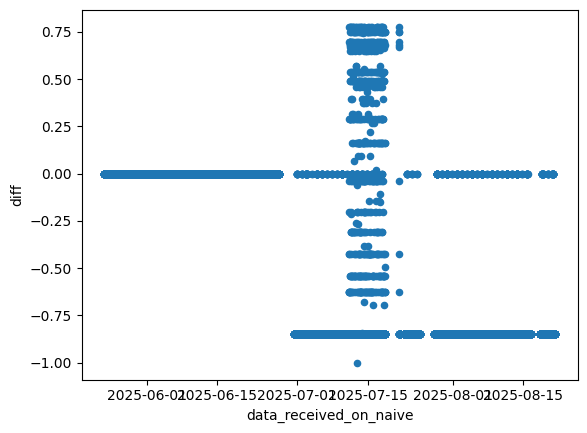

In [53]:
df_custom_scaled.plot(x='data_received_on_naive', y='diff', kind='scatter')

In [50]:
df_custom_scaled['diff'].describe()

count    36075.000000
mean        -0.444288
std          0.433034
min         -1.000000
25%         -0.850000
50%         -0.850000
75%          0.000000
max          0.775950
Name: diff, dtype: float64

In [57]:
resampled = df_custom_scaled.resample('H', on='data_received_on_naive').mean()

C:\Users\debas\AppData\Local\Temp\ipykernel_34216\4222400036.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled = df_custom_scaled.resample('H', on='data_received_on_naive').mean()


In [72]:
x = resampled['diff'].reset_index()['diff'].nunique(dropna=False)
x

309

In [73]:
resampled['diff'].value_counts()

diff
 0.000000    829
-0.850000    567
-0.850000     41
-0.850000     20
-0.850000      7
            ... 
-0.606761      1
-0.236111      1
-0.472222      1
-0.510000      1
-0.268421      1
Name: count, Length: 308, dtype: int64

In [22]:
converted_df.sort_index(inplace=True)
converted_df['next_timestamp'] = converted_df['data_received_on_naive'].shift(-1)
converted_df['time_difference'] = converted_df['next_timestamp'] - converted_df['data_received_on_naive']

converted_df

,data_received_on_naive,site,system_type,Bag filter dirty status,Fan Power meter (KW),OA Flow,OA Humid,OA Temp,Plant enable,RA temperature setpoint,...,SA Pressure setpoint,SA pressure,SA temp,Sup fan cmd,Trip status,airflow Status,auto Status,pre Filter dirty staus,next_timestamp,time_difference
0,2025-05-23 12:54:28.494,Ground Floor,AHU,inactive,10.544381141662598,0,56.90983200073242,35.93263626098633,active,25,...,500,300.8293151855469,16.580490112304688,inactive,active,active,inactive,inactive,2025-05-23 12:57:34.673,0 days 00:03:06.179000
1,2025-05-23 12:57:34.673,Ground Floor,AHU,inactive,10.452616691589355,0,61.045284271240234,41.045284271240234,active,25,...,500,306.1224365234375,17.448936462402344,inactive,active,active,inactive,inactive,2025-05-23 13:00:38.727,0 days 00:03:04.054000
2,2025-05-23 13:00:38.727,Ground Floor,AHU,inactive,10.013676643371582,0,65,44.06736755371094,active,25,...,500,303.1258850097656,18.034347534179688,inactive,active,active,inactive,inactive,2025-05-23 13:03:40.368,0 days 00:03:01.641000
3,2025-05-23 13:03:40.368,Ground Floor,AHU,inactive,9.500351905822754,0,67.43144989013672,46.691307067871094,active,25,...,500,294.4295959472656,18.49893569946289,inactive,active,active,inactive,inactive,2025-05-23 13:06:50.450,0 days 00:03:10.082000
4,2025-05-23 13:06:50.450,Ground Floor,AHU,inactive,7.586058616638184,0,69.94522094726562,50,active,25,...,500,251.2976531982422,18.797218322753906,inactive,active,active,inactive,inactive,2025-05-23 13:10:06.758,0 days 00:03:16.308000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36073,2025-08-21 08:02:48.708,Ground Floor,AHU,inactive,10.509812355041504,819.8904418945312,55.93263626098633,35.000003814697266,active,24.5,...,750,294.4295959472656,16.151063919067383,active,active,active,inactive,inactive,2025-08-21 08:05:48.796,0 days 00:03:00.088000
36074,2025-08-21 08:05:48.796,Ground Floor,AHU,inactive,10.509812355041504,819.56298828125,55.93263626098633,35.000003814697266,active,24.5,...,750,294.4295959472656,16.151063919067383,active,active,active,inactive,inactive,2025-08-21 08:08:47.990,0 days 00:02:59.194000
36075,2025-08-21 08:08:47.990,Ground Floor,AHU,inactive,10.452616691589355,819.0211181640625,55.000003814697266,34.12214660644531,active,24.5,...,750,290.3966369628906,15.945853233337402,active,active,active,inactive,inactive,2025-08-21 08:11:48.133,0 days 00:03:00.143000
36076,2025-08-21 08:11:48.133,Ground Floor,AHU,inactive,10.373425483703613,819.0211181640625,54.12214660644531,34.12214660644531,active,24.5,...,750,290.3966369628906,15.945853233337402,active,active,active,inactive,inactive,2025-08-21 08:14:47.259,0 days 00:02:59.126000


In [23]:
converted_df['pre_timestamp'] = converted_df['data_received_on_naive'].diff()
converted_df

,data_received_on_naive,site,system_type,Bag filter dirty status,Fan Power meter (KW),OA Flow,OA Humid,OA Temp,Plant enable,RA temperature setpoint,...,SA pressure,SA temp,Sup fan cmd,Trip status,airflow Status,auto Status,pre Filter dirty staus,next_timestamp,time_difference,pre_timestamp
0,2025-05-23 12:54:28.494,Ground Floor,AHU,inactive,10.544381141662598,0,56.90983200073242,35.93263626098633,active,25,...,300.8293151855469,16.580490112304688,inactive,active,active,inactive,inactive,2025-05-23 12:57:34.673,0 days 00:03:06.179000,NaT
1,2025-05-23 12:57:34.673,Ground Floor,AHU,inactive,10.452616691589355,0,61.045284271240234,41.045284271240234,active,25,...,306.1224365234375,17.448936462402344,inactive,active,active,inactive,inactive,2025-05-23 13:00:38.727,0 days 00:03:04.054000,0 days 00:03:06.179000
2,2025-05-23 13:00:38.727,Ground Floor,AHU,inactive,10.013676643371582,0,65,44.06736755371094,active,25,...,303.1258850097656,18.034347534179688,inactive,active,active,inactive,inactive,2025-05-23 13:03:40.368,0 days 00:03:01.641000,0 days 00:03:04.054000
3,2025-05-23 13:03:40.368,Ground Floor,AHU,inactive,9.500351905822754,0,67.43144989013672,46.691307067871094,active,25,...,294.4295959472656,18.49893569946289,inactive,active,active,inactive,inactive,2025-05-23 13:06:50.450,0 days 00:03:10.082000,0 days 00:03:01.641000
4,2025-05-23 13:06:50.450,Ground Floor,AHU,inactive,7.586058616638184,0,69.94522094726562,50,active,25,...,251.2976531982422,18.797218322753906,inactive,active,active,inactive,inactive,2025-05-23 13:10:06.758,0 days 00:03:16.308000,0 days 00:03:10.082000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36073,2025-08-21 08:02:48.708,Ground Floor,AHU,inactive,10.509812355041504,819.8904418945312,55.93263626098633,35.000003814697266,active,24.5,...,294.4295959472656,16.151063919067383,active,active,active,inactive,inactive,2025-08-21 08:05:48.796,0 days 00:03:00.088000,0 days 00:02:59.744000
36074,2025-08-21 08:05:48.796,Ground Floor,AHU,inactive,10.509812355041504,819.56298828125,55.93263626098633,35.000003814697266,active,24.5,...,294.4295959472656,16.151063919067383,active,active,active,inactive,inactive,2025-08-21 08:08:47.990,0 days 00:02:59.194000,0 days 00:03:00.088000
36075,2025-08-21 08:08:47.990,Ground Floor,AHU,inactive,10.452616691589355,819.0211181640625,55.000003814697266,34.12214660644531,active,24.5,...,290.3966369628906,15.945853233337402,active,active,active,inactive,inactive,2025-08-21 08:11:48.133,0 days 00:03:00.143000,0 days 00:02:59.194000
36076,2025-08-21 08:11:48.133,Ground Floor,AHU,inactive,10.373425483703613,819.0211181640625,54.12214660644531,34.12214660644531,active,24.5,...,290.3966369628906,15.945853233337402,active,active,active,inactive,inactive,2025-08-21 08:14:47.259,0 days 00:02:59.126000,0 days 00:03:00.143000


In [24]:
converted_df[converted_df['time_difference'] > pd.Timedelta(minutes=5)]

,data_received_on_naive,site,system_type,Bag filter dirty status,Fan Power meter (KW),OA Flow,OA Humid,OA Temp,Plant enable,RA temperature setpoint,...,SA pressure,SA temp,Sup fan cmd,Trip status,airflow Status,auto Status,pre Filter dirty staus,next_timestamp,time_difference,pre_timestamp
595,2025-05-24 20:15:51.002,Ground Floor,AHU,inactive,8.005816459655762,0,70,49.945220947265625,active,20,...,251.2976531982422,18.854108810424805,inactive,active,active,inactive,inactive,2025-05-24 20:33:39.766,0 days 00:17:48.764000,0 days 00:03:09.913000
597,2025-05-24 20:36:48.436,Ground Floor,AHU,inactive,8.665436744689941,0,69.13545227050781,48.660255432128906,active,20,...,280.8847961425781,18.854108810424805,inactive,active,active,inactive,inactive,2025-05-24 20:57:05.408,0 days 00:20:16.972000,0 days 00:03:08.670000
610,2025-05-24 21:32:41.550,Ground Floor,AHU,inactive,10.509812355041504,0,60,38.95471954345703,active,20,...,304.7845458984375,17.01951026916504,inactive,active,active,inactive,inactive,2025-05-24 22:01:08.038,0 days 00:28:26.488000,0 days 00:03:08.148000
615,2025-05-24 22:14:32.172,Ground Floor,AHU,inactive,6.379702091217041,0,64.06736755371094,45,active,20,...,195.3662872314453,17.448936462402344,inactive,active,active,inactive,inactive,2025-05-24 22:19:54.917,0 days 00:05:22.745000,0 days 00:03:32.353000
6117,2025-06-05 23:19:40.216,Ground Floor,AHU,inactive,7.586058616638184,0,51.909828186035156,32.56855010986328,active,20,...,199.3992919921875,14.98134708404541,inactive,active,active,inactive,inactive,2025-06-05 23:25:36.607,0 days 00:05:56.391000,0 days 00:02:00.026000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32986,2025-08-13 02:35:47.682,Ground Floor,AHU,inactive,10.013676643371582,813.3826293945312,65,44.06736755371094,active,24.5,...,303.1258850097656,18.034347534179688,active,active,active,inactive,inactive,2025-08-13 02:48:35.378,0 days 00:12:47.696000,0 days 00:03:03.090000
33005,2025-08-13 03:40:48.429,Ground Floor,AHU,inactive,10.273099899291992,817.3204956054688,63.090171813964844,42.07911682128906,active,24.5,...,305.78704833984375,17.654146194458008,active,active,active,inactive,inactive,2025-08-13 03:50:40.054,0 days 00:09:51.625000,0 days 00:01:52.968000
33008,2025-08-13 03:56:46.913,Ground Floor,AHU,inactive,9.857418060302734,811.7556762695312,66.6913070678711,45.87785339355469,active,24.5,...,297.919921875,18.36060333251953,active,active,active,inactive,inactive,2025-08-13 04:16:43.000,0 days 00:19:56.087000,0 days 00:03:00.325000
33103,2025-08-13 09:06:03.733,Ground Floor,AHU,inactive,9.68568229675293,810,66.6913070678711,45.87785339355469,active,24.5,...,297.919921875,18.36060333251953,active,active,active,inactive,inactive,2025-08-13 09:19:22.452,0 days 00:13:18.719000,0 days 00:03:15.453000


In [25]:
converted_df.shape

(36078, 29)

In [26]:
numeric_cols = [
    "RA Damper feedback", "SA Pressure setpoint", "OA Humid", "RA Temp",
    "RA CO2", "RA CO2 setpoint", "SA Fan Speed feedback", "SA Fan Speed control",
    "RA Temp control( Valve Feedback)", "SA pressure", "Fan Power meter (KW)",
    "RA damper control", "OA Temp", "OA Flow", "SA temp", "RA  temperature setpoint"
]

In [27]:
converted_df[numeric_cols] = converted_df[numeric_cols].apply(pd.to_numeric)
converted_df

,data_received_on_naive,site,system_type,Bag filter dirty status,Fan Power meter (KW),OA Flow,OA Humid,OA Temp,Plant enable,RA temperature setpoint,...,SA pressure,SA temp,Sup fan cmd,Trip status,airflow Status,auto Status,pre Filter dirty staus,next_timestamp,time_difference,pre_timestamp
0,2025-05-23 12:54:28.494,Ground Floor,AHU,inactive,10.544381,0.000000,56.909832,35.932636,active,25.0,...,300.829315,16.580490,inactive,active,active,inactive,inactive,2025-05-23 12:57:34.673,0 days 00:03:06.179000,NaT
1,2025-05-23 12:57:34.673,Ground Floor,AHU,inactive,10.452617,0.000000,61.045284,41.045284,active,25.0,...,306.122437,17.448936,inactive,active,active,inactive,inactive,2025-05-23 13:00:38.727,0 days 00:03:04.054000,0 days 00:03:06.179000
2,2025-05-23 13:00:38.727,Ground Floor,AHU,inactive,10.013677,0.000000,65.000000,44.067368,active,25.0,...,303.125885,18.034348,inactive,active,active,inactive,inactive,2025-05-23 13:03:40.368,0 days 00:03:01.641000,0 days 00:03:04.054000
3,2025-05-23 13:03:40.368,Ground Floor,AHU,inactive,9.500352,0.000000,67.431450,46.691307,active,25.0,...,294.429596,18.498936,inactive,active,active,inactive,inactive,2025-05-23 13:06:50.450,0 days 00:03:10.082000,0 days 00:03:01.641000
4,2025-05-23 13:06:50.450,Ground Floor,AHU,inactive,7.586059,0.000000,69.945221,50.000000,active,25.0,...,251.297653,18.797218,inactive,active,active,inactive,inactive,2025-05-23 13:10:06.758,0 days 00:03:16.308000,0 days 00:03:10.082000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36073,2025-08-21 08:02:48.708,Ground Floor,AHU,inactive,10.509812,819.890442,55.932636,35.000004,active,24.5,...,294.429596,16.151064,active,active,active,inactive,inactive,2025-08-21 08:05:48.796,0 days 00:03:00.088000,0 days 00:02:59.744000
36074,2025-08-21 08:05:48.796,Ground Floor,AHU,inactive,10.509812,819.562988,55.932636,35.000004,active,24.5,...,294.429596,16.151064,active,active,active,inactive,inactive,2025-08-21 08:08:47.990,0 days 00:02:59.194000,0 days 00:03:00.088000
36075,2025-08-21 08:08:47.990,Ground Floor,AHU,inactive,10.452617,819.021118,55.000004,34.122147,active,24.5,...,290.396637,15.945853,active,active,active,inactive,inactive,2025-08-21 08:11:48.133,0 days 00:03:00.143000,0 days 00:02:59.194000
36076,2025-08-21 08:11:48.133,Ground Floor,AHU,inactive,10.373425,819.021118,54.122147,34.122147,active,24.5,...,290.396637,15.945853,active,active,active,inactive,inactive,2025-08-21 08:14:47.259,0 days 00:02:59.126000,0 days 00:03:00.143000


In [28]:
converted_df.dtypes

data_received_on_naive               datetime64[ns]
site                                         object
system_type                                  object
Bag filter dirty status                      object
Fan Power meter (KW)                        float64
OA Flow                                     float64
OA Humid                                    float64
OA Temp                                     float64
Plant enable                                 object
RA  temperature setpoint                    float64
RA CO2                                      float64
RA CO2 setpoint                             float64
RA Damper feedback                          float64
RA Temp                                     float64
RA Temp control( Valve Feedback)            float64
RA damper control                           float64
SA Fan Speed control                        float64
SA Fan Speed feedback                       float64
SA Pressure setpoint                        float64
SA pressure 

In [29]:
converted_df.size / (1024*1024)

0.9977931976318359

In [30]:
converted_df.describe()

,data_received_on_naive,Fan Power meter (KW),OA Flow,OA Humid,OA Temp,RA temperature setpoint,RA CO2,RA CO2 setpoint,RA Damper feedback,RA Temp,RA Temp control( Valve Feedback),RA damper control,SA Fan Speed control,SA Fan Speed feedback,SA Pressure setpoint,SA pressure,SA temp,next_timestamp,time_difference,pre_timestamp
count,36078,36075.000000,36075.000000,36076.000000,36078.000000,36076.000000,36077.000000,36075.000000,36075.000000,36075.000000,36075.000000,36075.000000,36075.000000,36075.000000,36075.000000,36077.000000,36076.000000,36077,36077,36077
mean,2025-07-05 15:23:26.321838336,8.421704,428.118270,60.192519,40.194329,22.080178,1198.776849,783.989314,9.102070,24.055069,33.466686,5.353083,54.431046,54.431046,741.961192,244.678706,16.838221,2025-07-05 15:25:09.549319424,0 days 00:03:35.073835546,0 days 00:03:35.073835546
min,2025-05-23 12:54:28.494000,6.333568,0.000000,50.000000,30.000000,20.000000,900.000000,7.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,450.000000,183.673462,14.700000,2025-05-23 12:57:34.673000,0 days 00:00:00.006000,0 days 00:00:00.006000
25%,2025-06-12 01:30:55.218500096,7.032095,0.000000,53.308693,33.308693,20.000000,999.260803,750.000000,0.000000,21.992607,0.000000,0.000000,0.000000,0.000000,500.000000,203.930771,15.394825,2025-06-12 01:32:20.788999936,0 days 00:02:59.574000,0 days 00:02:59.574000
50%,2025-07-05 00:40:30.124499968,8.444757,780.437012,60.000000,40.000000,22.000000,1200.000000,800.000000,15.000000,24.000000,0.000000,10.000000,100.000000,100.000000,750.000000,244.897949,16.799999,2025-07-05 00:42:06.156000,0 days 00:03:02.515000,0 days 00:03:02.515000
75%,2025-07-31 03:10:46.748250112,9.857419,802.090515,67.431450,47.431450,24.500000,1400.739258,900.000000,15.000000,26.229435,96.981369,10.000000,100.000000,100.000000,1000.000000,285.865143,18.360603,2025-07-31 03:11:31.670000128,0 days 00:03:08.405000,0 days 00:03:08.405000
max,2025-08-21 08:14:47.259000,10.555946,820.000000,70.000000,50.000000,29.000000,1500.000000,900.000000,100.000000,27.000000,100.000000,10.000000,100.000000,100.000000,1000.000000,306.122437,18.900000,2025-08-21 08:14:47.259000,2 days 21:53:34.532000,2 days 21:53:34.532000
std,NaN,1.482508,396.919287,7.131367,7.134006,1.982344,210.085265,183.902134,11.397596,2.137139,45.684134,4.956742,49.803962,49.803962,206.027751,42.885574,1.495262,NaN,0 days 00:40:26.414572867,0 days 00:40:26.414572867


In [31]:
def plot_float_distributions(df: pd.DataFrame):
    """
    Identifies all float columns in a DataFrame and generates a KDE plot and a
    box plot for each one.

    Args:
        df (pd.DataFrame): The input DataFrame.
    """
    float_columns = df.select_dtypes(include=['float64', 'float32']).columns

    if len(float_columns) == 0:
        print("No float columns found in the DataFrame.")
        return

    print(f"Found {len(float_columns)} float columns: {', '.join(float_columns)}")

    for col in float_columns:
        fig, axes = plt.subplots(1, 3, figsize=(14, 5))

        sns.kdeplot(data=df, x=col, fill=True, ax=axes[0], color='skyblue')
        axes[0].set_title(f'KDE Plot of {col}')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Density')

        sns.boxplot(data=df, x=col, ax=axes[1], color='salmon')
        axes[1].set_title(f'Box Plot of {col}')
        axes[1].set_xlabel(col)
        
        stats.probplot(df[col], dist="norm", plot=axes[2])
        plt.title(f'Normal Q-Q plot of {col}')
        plt.xlabel('Theoretical quantiles')
        plt.ylabel('Ordered Values')
        plt.grid(True)
        

        fig.suptitle(f'Distribution Analysis for "{col}"', fontsize=16, y=1.02)

        plt.tight_layout()
        
        plt.show()

Found 16 float columns: Fan Power meter (KW), OA Flow, OA Humid, OA Temp, RA  temperature setpoint, RA CO2, RA CO2 setpoint, RA Damper feedback, RA Temp, RA Temp control( Valve Feedback), RA damper control, SA Fan Speed control, SA Fan Speed feedback, SA Pressure setpoint, SA pressure, SA temp


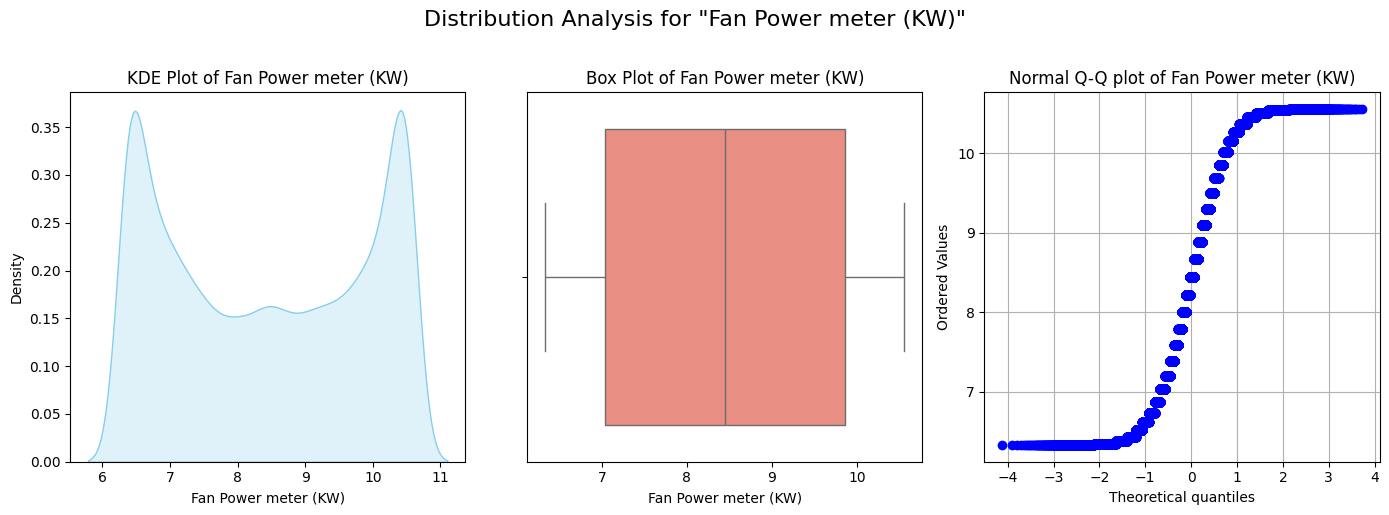

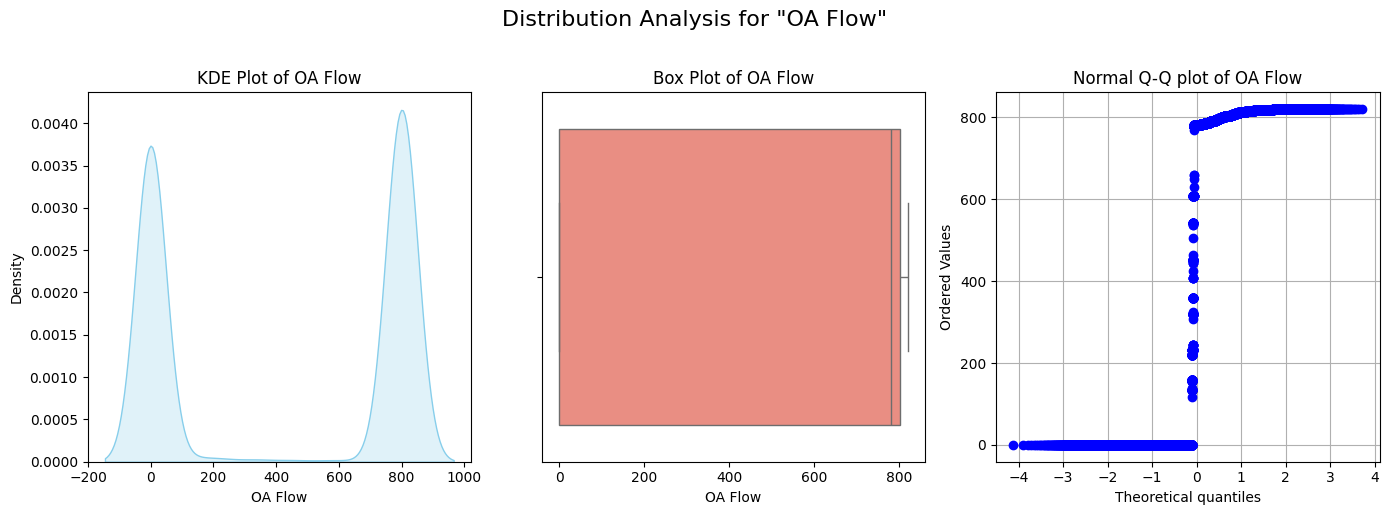

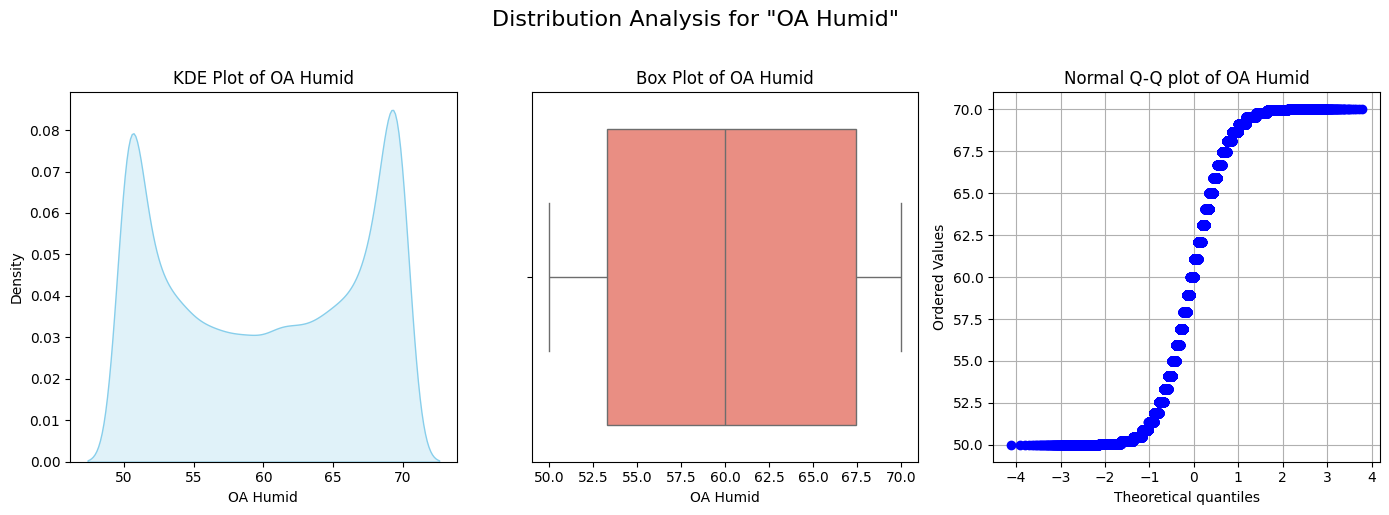

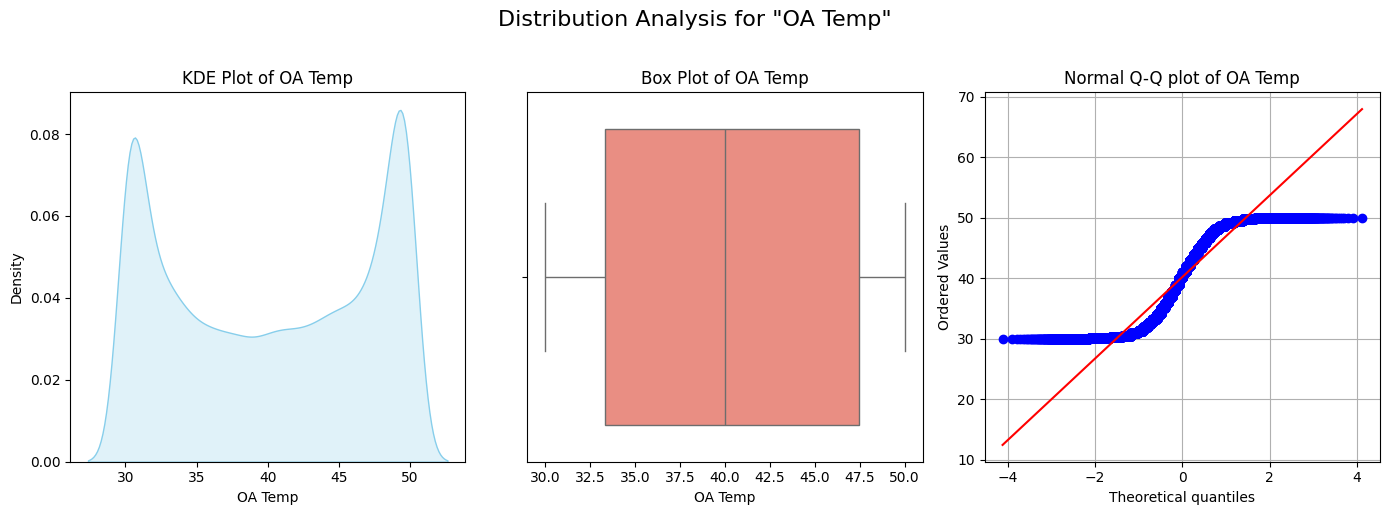

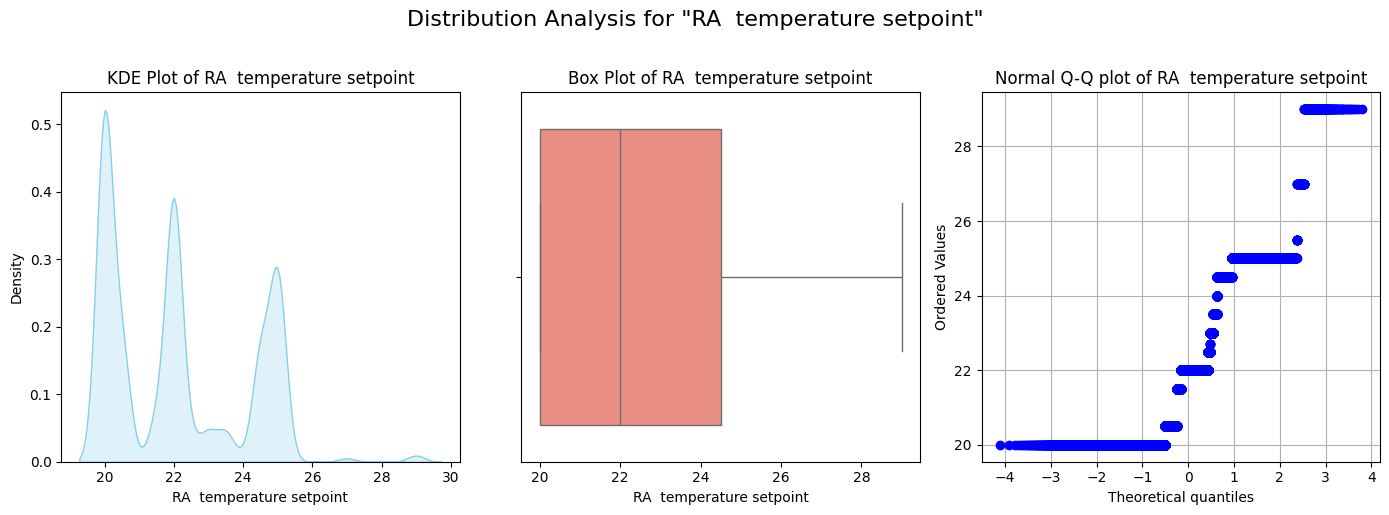

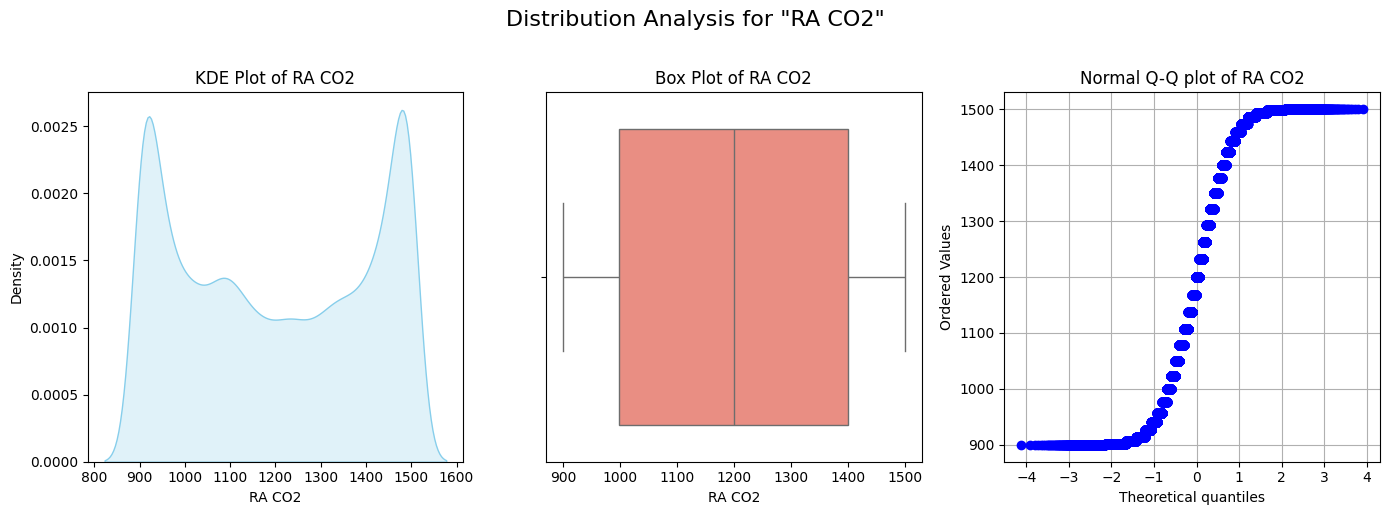

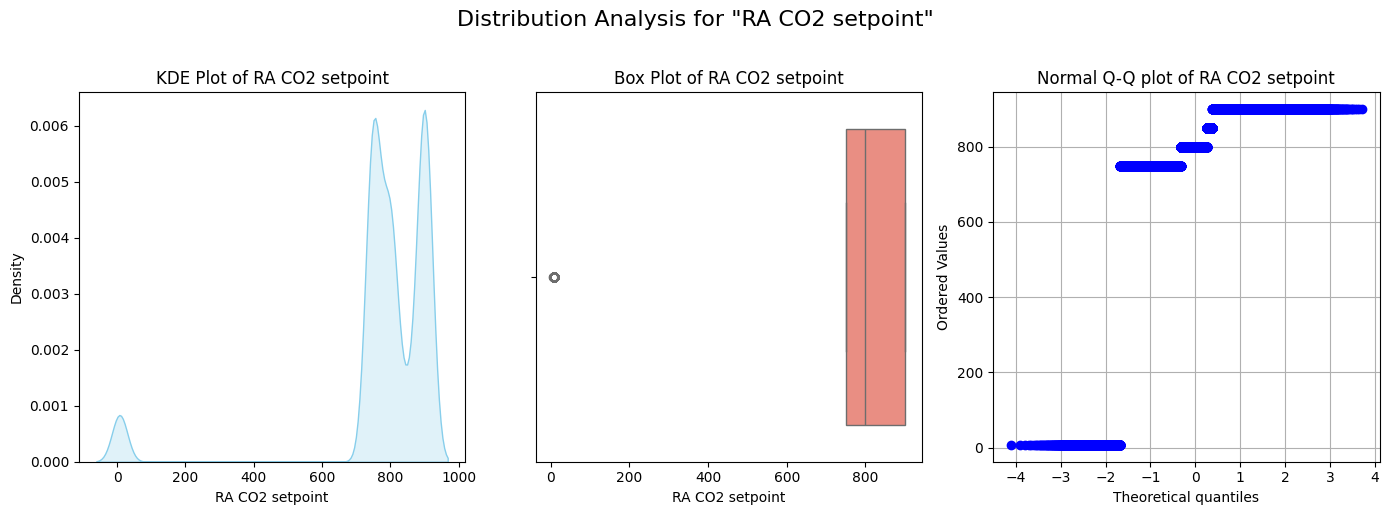

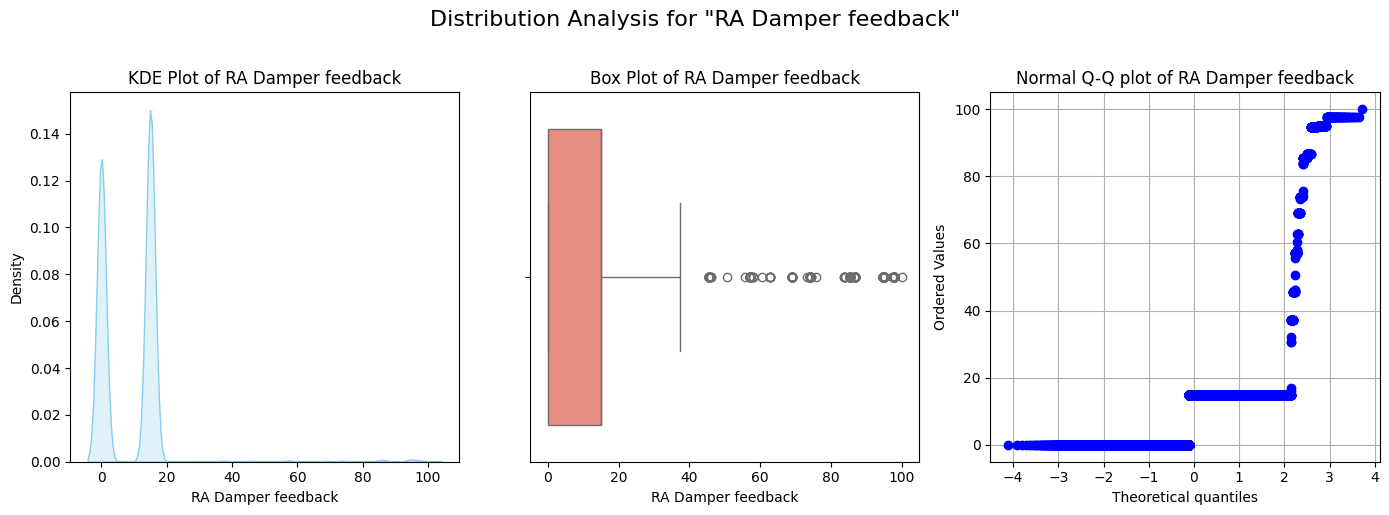

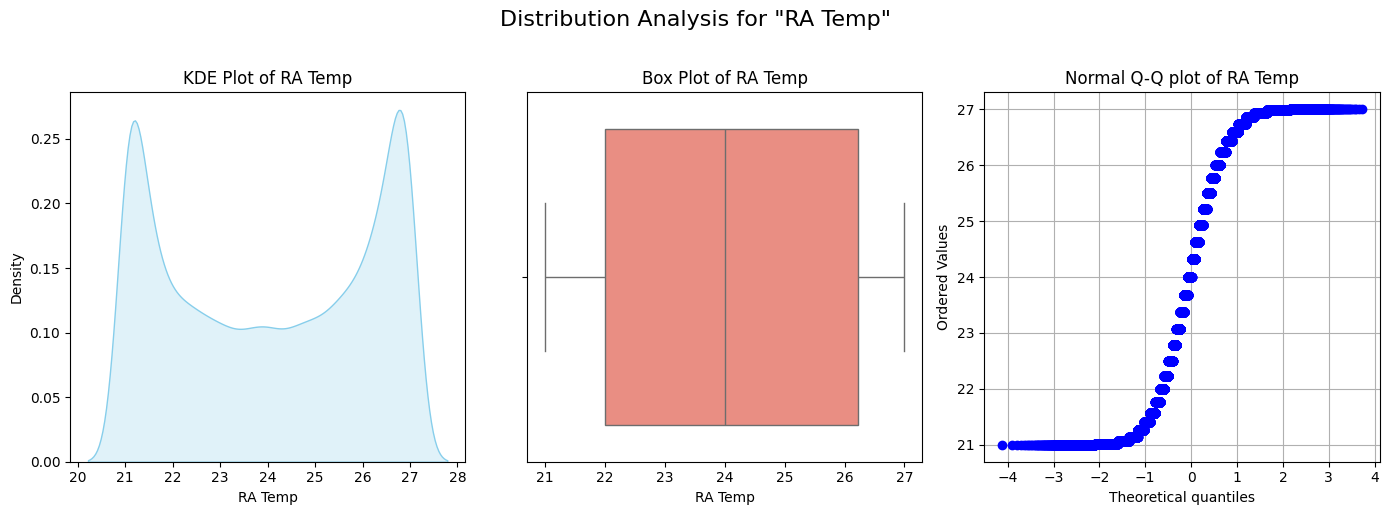

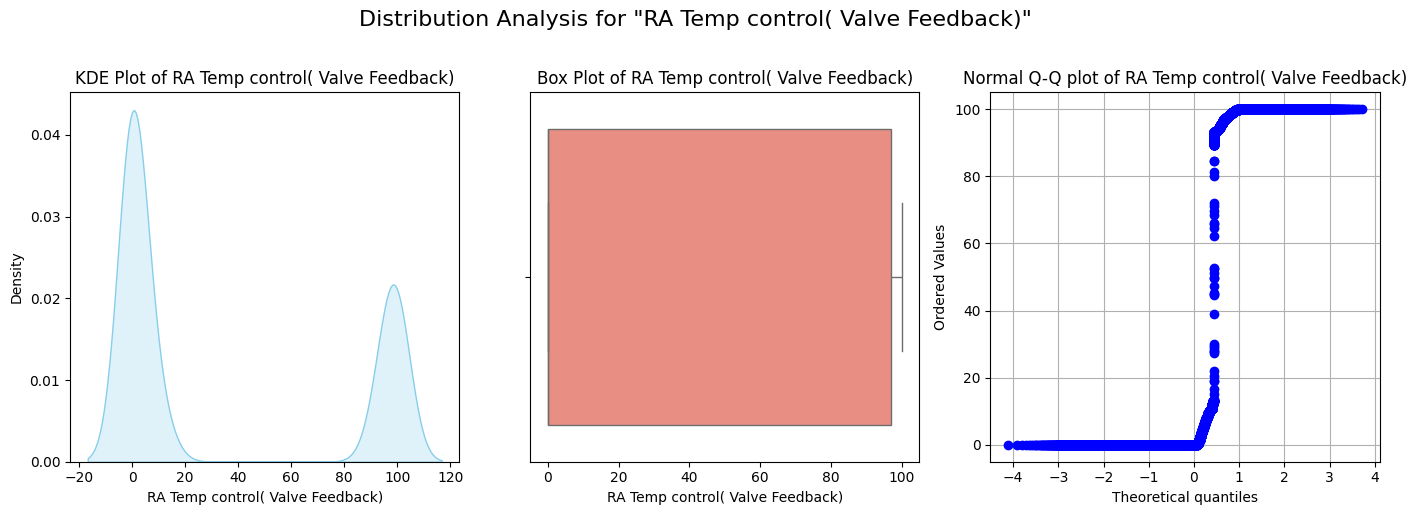

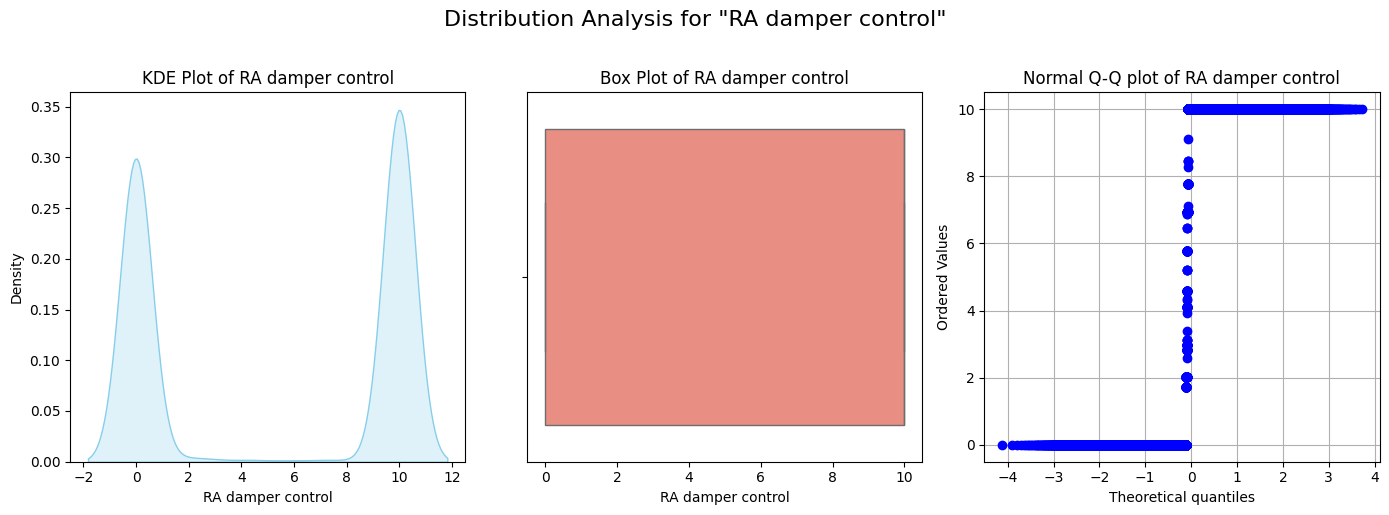

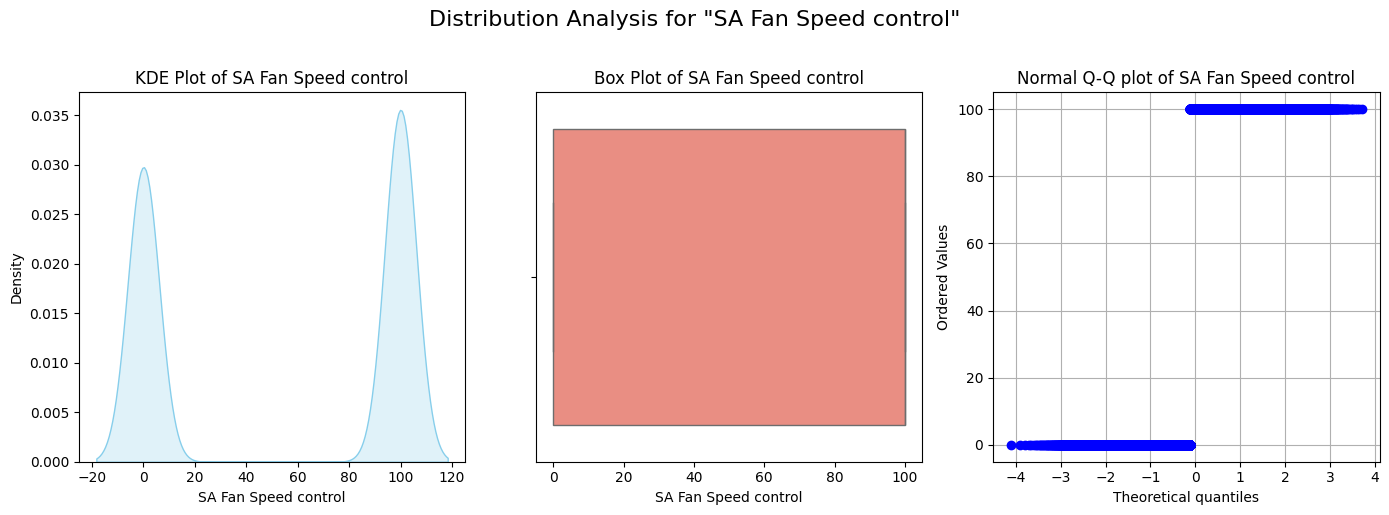

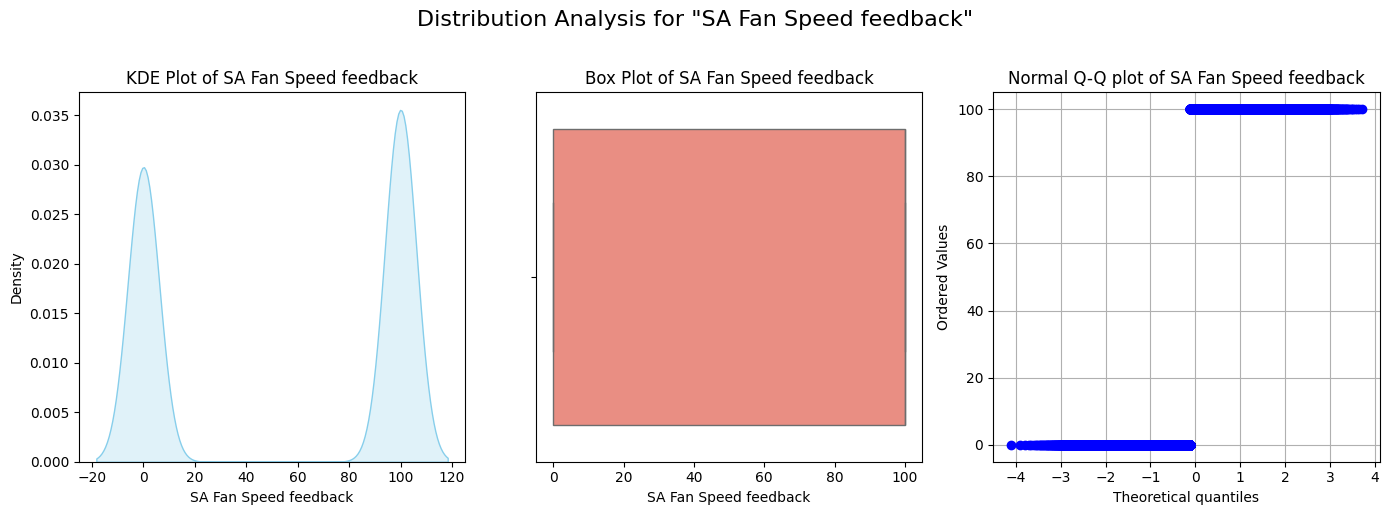

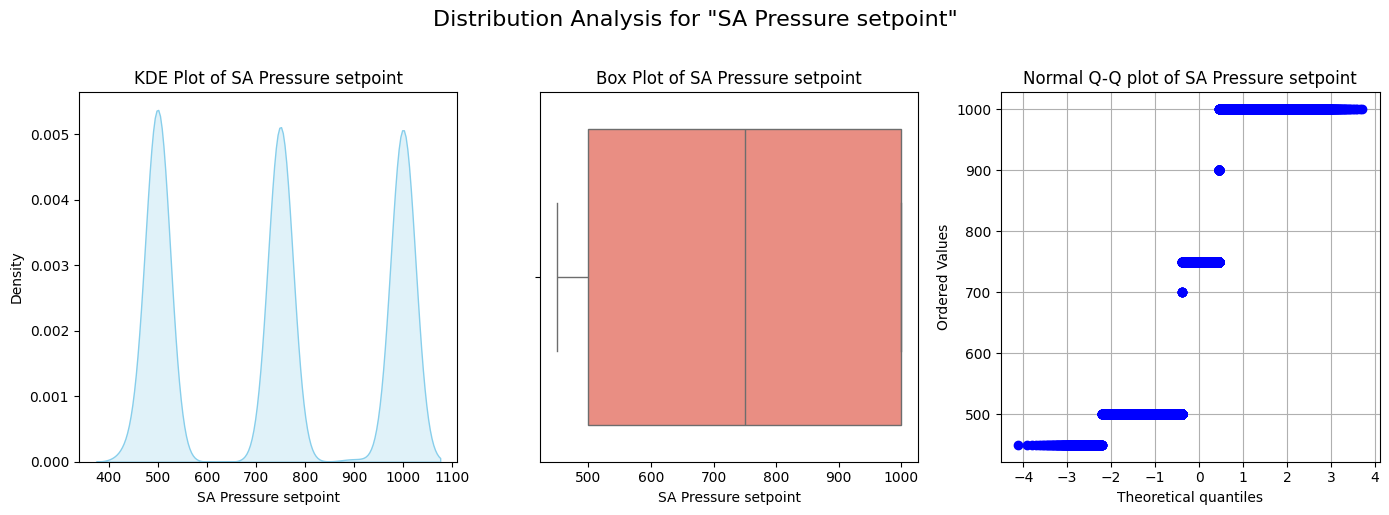

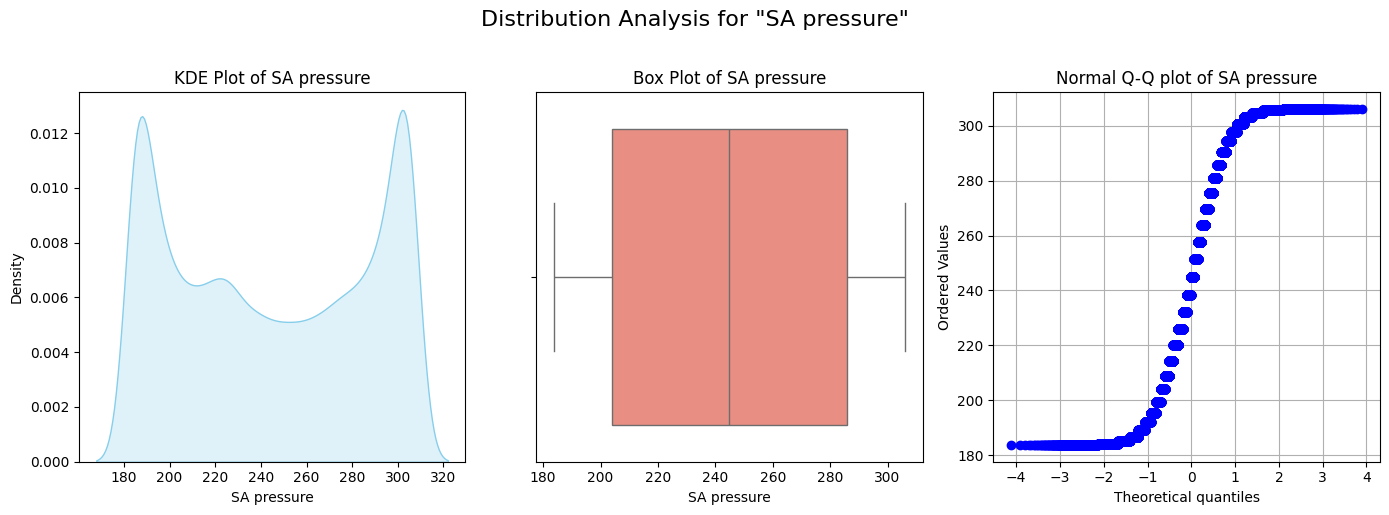

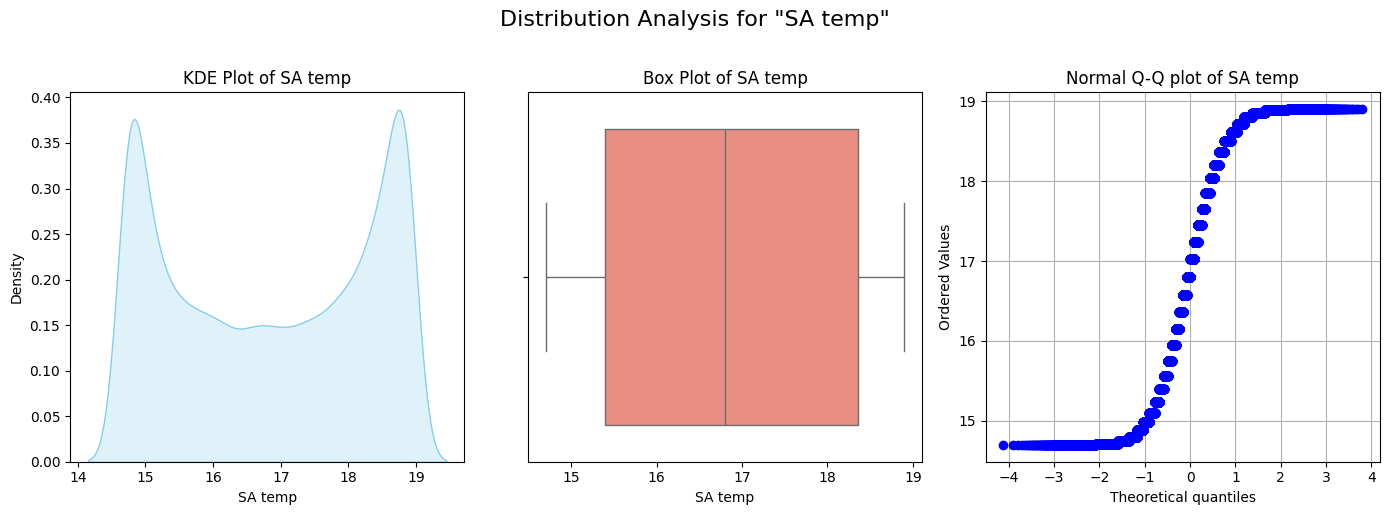

In [32]:
plot_float_distributions(converted_df)

In [33]:
converted_df.drop(columns=['next_timestamp','time_difference','pre_timestamp'], inplace=True)
converted_df

,data_received_on_naive,site,system_type,Bag filter dirty status,Fan Power meter (KW),OA Flow,OA Humid,OA Temp,Plant enable,RA temperature setpoint,...,SA Fan Speed control,SA Fan Speed feedback,SA Pressure setpoint,SA pressure,SA temp,Sup fan cmd,Trip status,airflow Status,auto Status,pre Filter dirty staus
0,2025-05-23 12:54:28.494,Ground Floor,AHU,inactive,10.544381,0.000000,56.909832,35.932636,active,25.0,...,0.0,0.0,500.0,300.829315,16.580490,inactive,active,active,inactive,inactive
1,2025-05-23 12:57:34.673,Ground Floor,AHU,inactive,10.452617,0.000000,61.045284,41.045284,active,25.0,...,0.0,0.0,500.0,306.122437,17.448936,inactive,active,active,inactive,inactive
2,2025-05-23 13:00:38.727,Ground Floor,AHU,inactive,10.013677,0.000000,65.000000,44.067368,active,25.0,...,0.0,0.0,500.0,303.125885,18.034348,inactive,active,active,inactive,inactive
3,2025-05-23 13:03:40.368,Ground Floor,AHU,inactive,9.500352,0.000000,67.431450,46.691307,active,25.0,...,0.0,0.0,500.0,294.429596,18.498936,inactive,active,active,inactive,inactive
4,2025-05-23 13:06:50.450,Ground Floor,AHU,inactive,7.586059,0.000000,69.945221,50.000000,active,25.0,...,0.0,0.0,500.0,251.297653,18.797218,inactive,active,active,inactive,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36073,2025-08-21 08:02:48.708,Ground Floor,AHU,inactive,10.509812,819.890442,55.932636,35.000004,active,24.5,...,100.0,100.0,750.0,294.429596,16.151064,active,active,active,inactive,inactive
36074,2025-08-21 08:05:48.796,Ground Floor,AHU,inactive,10.509812,819.562988,55.932636,35.000004,active,24.5,...,100.0,100.0,750.0,294.429596,16.151064,active,active,active,inactive,inactive
36075,2025-08-21 08:08:47.990,Ground Floor,AHU,inactive,10.452617,819.021118,55.000004,34.122147,active,24.5,...,100.0,100.0,750.0,290.396637,15.945853,active,active,active,inactive,inactive
36076,2025-08-21 08:11:48.133,Ground Floor,AHU,inactive,10.373425,819.021118,54.122147,34.122147,active,24.5,...,100.0,100.0,750.0,290.396637,15.945853,active,active,active,inactive,inactive


In [34]:
categorical_cols = converted_df.select_dtypes(include=['object']).columns.to_list()

In [35]:
inefficient_cols = [col for col in converted_df.columns if converted_df[col].nunique() == 1 ]
inefficient_cols

['site',
 'system_type',
 'Bag filter dirty status',
 'Plant enable',
 'Trip status',
 'airflow Status',
 'auto Status',
 'pre Filter dirty staus']

In [36]:
for i in categorical_cols:
    print(f"{i}: {converted_df[i].nunique()} unique values")
    print(converted_df[i].value_counts())
    print()

site: 1 unique values
site
Ground Floor    36078
Name: count, dtype: int64

system_type: 1 unique values
system_type
AHU    36078
Name: count, dtype: int64

Bag filter dirty status: 1 unique values
Bag filter dirty status
inactive    36071
Name: count, dtype: int64

Plant enable: 1 unique values
Plant enable
active    36071
Name: count, dtype: int64

Sup fan cmd: 2 unique values
Sup fan cmd
active      19639
inactive    16432
Name: count, dtype: int64

Trip status: 1 unique values
Trip status
active    36071
Name: count, dtype: int64

airflow Status: 1 unique values
airflow Status
active    36072
Name: count, dtype: int64

auto Status: 1 unique values
auto Status
inactive    36071
Name: count, dtype: int64

pre Filter dirty staus: 1 unique values
pre Filter dirty staus
inactive    36071
Name: count, dtype: int64



In [37]:
converted_df.drop(columns=inefficient_cols, inplace=True)
converted_df

,data_received_on_naive,Fan Power meter (KW),OA Flow,OA Humid,OA Temp,RA temperature setpoint,RA CO2,RA CO2 setpoint,RA Damper feedback,RA Temp,RA Temp control( Valve Feedback),RA damper control,SA Fan Speed control,SA Fan Speed feedback,SA Pressure setpoint,SA pressure,SA temp,Sup fan cmd
0,2025-05-23 12:54:28.494,10.544381,0.000000,56.909832,35.932636,25.0,1474.063721,850.0,0.0,23.376265,0.000000,0.0,0.0,0.0,500.0,300.829315,16.580490,inactive
1,2025-05-23 12:57:34.673,10.452617,0.000000,61.045284,41.045284,25.0,1500.000000,850.0,0.0,24.927052,0.000000,0.0,0.0,0.0,500.0,306.122437,17.448936,inactive
2,2025-05-23 13:00:38.727,10.013677,0.000000,65.000000,44.067368,25.0,1474.063599,850.0,0.0,25.763355,0.000000,0.0,0.0,0.0,500.0,303.125885,18.034348,inactive
3,2025-05-23 13:03:40.368,9.500352,0.000000,67.431450,46.691307,25.0,1422.943481,850.0,0.0,26.427052,0.000000,0.0,0.0,0.0,500.0,294.429596,18.498936,inactive
4,2025-05-23 13:06:50.450,7.586059,0.000000,69.945221,50.000000,25.0,1200.000000,850.0,0.0,26.934443,0.000000,0.0,0.0,0.0,500.0,251.297653,18.797218,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36073,2025-08-21 08:02:48.708,10.509812,819.890442,55.932636,35.000004,24.5,1459.807617,750.0,15.0,23.072948,1.603050,10.0,100.0,100.0,750.0,294.429596,16.151064,active
36074,2025-08-21 08:05:48.796,10.509812,819.562988,55.932636,35.000004,24.5,1442.705078,750.0,15.0,23.072948,1.121165,10.0,100.0,100.0,750.0,294.429596,16.151064,active
36075,2025-08-21 08:08:47.990,10.452617,819.021118,55.000004,34.122147,24.5,1422.943481,750.0,15.0,22.779791,0.720260,10.0,100.0,100.0,750.0,290.396637,15.945853,active
36076,2025-08-21 08:11:48.133,10.373425,819.021118,54.122147,34.122147,24.5,1422.943481,750.0,15.0,22.779791,0.720260,10.0,100.0,100.0,750.0,290.396637,15.945853,active


In [38]:
converted_df[converted_df.isna().any(axis=1)]

,data_received_on_naive,Fan Power meter (KW),OA Flow,OA Humid,OA Temp,RA temperature setpoint,RA CO2,RA CO2 setpoint,RA Damper feedback,RA Temp,RA Temp control( Valve Feedback),RA damper control,SA Fan Speed control,SA Fan Speed feedback,SA Pressure setpoint,SA pressure,SA temp,Sup fan cmd
10251,2025-06-14 14:01:17.709,6.333568,0.000000,62.079117,43.090172,20.0,914.683044,900.0,0.0,24.313585,0.000000,0.0,0.0,0.0,500.0,188.966599,17.019510,NaN
11459,2025-06-17 11:09:02.253,NaN,NaN,NaN,49.781479,NaN,1292.705078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,263.817352,NaN,NaN
11806,2025-06-18 12:22:28.605,NaN,NaN,69.510567,49.135452,NaN,1322.020996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275.510193,NaN,NaN
12156,2025-06-19 06:25:05.764,6.516089,0.000000,65.877853,45.877853,21.5,977.056580,7.5,0.0,25.220209,0.000000,0.0,0.0,0.0,500.0,199.399292,17.654146,NaN
25090,2025-07-23 13:49:20.494,6.875837,783.819641,68.090172,48.660255,22.0,1050.000000,750.0,15.0,26.229435,100.000000,10.0,100.0,100.0,750.0,214.285706,18.205175,NaN
32575,2025-08-12 06:00:36.980,6.516089,780.978882,65.877853,45.877853,22.0,977.056580,750.0,15.0,25.220209,99.984467,10.0,100.0,100.0,750.0,199.399292,17.654146,NaN
36077,2025-08-21 08:14:47.259,NaN,NaN,NaN,33.308693,24.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.945853,NaN


In [39]:
converted_df.dropna(inplace=True)

In [40]:
converted_df.isna().sum()

data_received_on_naive              0
Fan Power meter (KW)                0
OA Flow                             0
OA Humid                            0
OA Temp                             0
RA  temperature setpoint            0
RA CO2                              0
RA CO2 setpoint                     0
RA Damper feedback                  0
RA Temp                             0
RA Temp control( Valve Feedback)    0
RA damper control                   0
SA Fan Speed control                0
SA Fan Speed feedback               0
SA Pressure setpoint                0
SA pressure                         0
SA temp                             0
Sup fan cmd                         0
dtype: int64

In [41]:
create_hierarchical_stats

<function __main__.create_hierarchical_stats(df: pandas.core.frame.DataFrame, hierarchy_keys: List[str], target_column: str = 'monitoring_data') -> Dict[str, Any]>

In [42]:
neededCols = converted_df.select_dtypes(include=['float64', 'float32','object']).columns

In [43]:
for i in neededCols:
    if converted_df[i].dtype == 'object':
        print(f"{i}: {converted_df[i].nunique()} unique values")
        print(converted_df[i].value_counts())
        
    else:
        print(f"{i} :: ")
        print(converted_df[i].describe())
        
    print()

Fan Power meter (KW) :: 
count    36071.000000
mean         8.421910
std          1.482459
min          6.333568
25%          7.032095
50%          8.444757
75%          9.857419
max         10.555946
Name: Fan Power meter (KW), dtype: float64

OA Flow :: 
count    36071.000000
mean       428.122364
std        396.919727
min          0.000000
25%          0.000000
50%        780.437012
75%        802.090515
max        820.000000
Name: OA Flow, dtype: float64

OA Humid :: 
count    36071.000000
mean        60.191674
std          7.131438
min         50.000000
25%         53.308693
50%         60.000000
75%         67.431450
max         70.000000
Name: OA Humid, dtype: float64

OA Temp :: 
count    36071.000000
mean        40.193376
std          7.133991
min         30.000000
25%         33.308693
50%         40.000000
75%         47.431450
max         50.000000
Name: OA Temp, dtype: float64

RA  temperature setpoint :: 
count    36071.000000
mean        22.080189
std          1.982408
m

In [44]:
mappings = {'active': 1, 'inactive': 0}
converted_df["Sup fan cmd"] = converted_df["Sup fan cmd"].replace(mappings)


C:\Users\debas\AppData\Local\Temp\ipykernel_36184\2849997320.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  converted_df["Sup fan cmd"] = converted_df["Sup fan cmd"].replace(mappings)


In [45]:
converted_df

,data_received_on_naive,Fan Power meter (KW),OA Flow,OA Humid,OA Temp,RA temperature setpoint,RA CO2,RA CO2 setpoint,RA Damper feedback,RA Temp,RA Temp control( Valve Feedback),RA damper control,SA Fan Speed control,SA Fan Speed feedback,SA Pressure setpoint,SA pressure,SA temp,Sup fan cmd
0,2025-05-23 12:54:28.494,10.544381,0.000000,56.909832,35.932636,25.0,1474.063721,850.0,0.0,23.376265,0.000000,0.0,0.0,0.0,500.0,300.829315,16.580490,0
1,2025-05-23 12:57:34.673,10.452617,0.000000,61.045284,41.045284,25.0,1500.000000,850.0,0.0,24.927052,0.000000,0.0,0.0,0.0,500.0,306.122437,17.448936,0
2,2025-05-23 13:00:38.727,10.013677,0.000000,65.000000,44.067368,25.0,1474.063599,850.0,0.0,25.763355,0.000000,0.0,0.0,0.0,500.0,303.125885,18.034348,0
3,2025-05-23 13:03:40.368,9.500352,0.000000,67.431450,46.691307,25.0,1422.943481,850.0,0.0,26.427052,0.000000,0.0,0.0,0.0,500.0,294.429596,18.498936,0
4,2025-05-23 13:06:50.450,7.586059,0.000000,69.945221,50.000000,25.0,1200.000000,850.0,0.0,26.934443,0.000000,0.0,0.0,0.0,500.0,251.297653,18.797218,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36072,2025-08-21 07:59:48.964,10.509812,819.890442,55.932636,35.000004,24.5,1459.807617,750.0,15.0,23.072948,1.603050,10.0,100.0,100.0,750.0,297.919922,16.363384,1
36073,2025-08-21 08:02:48.708,10.509812,819.890442,55.932636,35.000004,24.5,1459.807617,750.0,15.0,23.072948,1.603050,10.0,100.0,100.0,750.0,294.429596,16.151064,1
36074,2025-08-21 08:05:48.796,10.509812,819.562988,55.932636,35.000004,24.5,1442.705078,750.0,15.0,23.072948,1.121165,10.0,100.0,100.0,750.0,294.429596,16.151064,1
36075,2025-08-21 08:08:47.990,10.452617,819.021118,55.000004,34.122147,24.5,1422.943481,750.0,15.0,22.779791,0.720260,10.0,100.0,100.0,750.0,290.396637,15.945853,1


In [46]:
target_columns = ["RA damper control", "RA Temp control( Valve Feedback)", "SA Fan Speed control", "Fan Power meter (KW)"]


In [47]:
converted_df.corr()

,data_received_on_naive,Fan Power meter (KW),OA Flow,OA Humid,OA Temp,RA temperature setpoint,RA CO2,RA CO2 setpoint,RA Damper feedback,RA Temp,RA Temp control( Valve Feedback),RA damper control,SA Fan Speed control,SA Fan Speed feedback,SA Pressure setpoint,SA pressure,SA temp,Sup fan cmd
data_received_on_naive,1.000000,0.035522,0.836510,-0.038862,-0.041076,0.471446,0.021926,-0.132181,0.578316,-0.035260,0.596044,0.836778,0.839013,0.839013,0.464820,0.020765,-0.034408,0.839292
Fan Power meter (KW),0.035522,1.000000,0.067459,-0.232545,-0.309155,0.082032,0.933657,-0.018830,-0.097043,-0.100716,-0.082752,0.047314,0.022913,0.022913,0.021036,0.922981,-0.073857,0.023293
OA Flow,0.836510,0.067459,1.000000,-0.027950,-0.032981,0.447301,0.058107,0.011746,0.613694,-0.019701,0.642128,0.995931,0.986911,0.986911,0.574641,0.057220,-0.018007,0.985502
OA Humid,-0.038862,-0.232545,-0.027950,1.000000,0.995651,-0.055939,0.125636,0.034909,0.009133,0.989766,0.071919,-0.017336,-0.017213,-0.017213,-0.010979,0.153209,0.985401,-0.017777
OA Temp,-0.041076,-0.309155,-0.032981,0.995651,1.000000,-0.061261,0.046040,0.035965,0.016884,0.976509,0.076739,-0.021003,-0.018846,-0.018846,-0.012291,0.073925,0.969630,-0.019416
RA temperature setpoint,0.471446,0.082032,0.447301,-0.055939,-0.061261,1.000000,0.062910,-0.306047,0.215372,-0.046436,-0.140429,0.445153,0.428629,0.428629,0.601157,0.061116,-0.044359,0.428488
RA CO2,0.021926,0.933657,0.058107,0.125636,0.046040,0.062910,1.000000,-0.006352,-0.096185,0.256663,-0.059535,0.041342,0.016500,0.016500,0.016470,0.998477,0.282649,0.016697
RA CO2 setpoint,-0.132181,-0.018830,0.011746,0.034909,0.035965,-0.306047,-0.006352,1.000000,0.067270,0.033216,0.038554,0.012119,0.023466,0.023466,0.119682,-0.005189,0.033102,0.023506
RA Damper feedback,0.578316,-0.097043,0.613694,0.009133,0.016884,0.215372,-0.096185,0.067270,1.000000,-0.003993,0.558776,0.629810,0.730693,0.730693,0.492254,-0.095593,-0.006516,0.729279
RA Temp,-0.035260,-0.100716,-0.019701,0.989766,0.976509,-0.046436,0.256663,0.033216,-0.003993,1.000000,0.062304,-0.011514,-0.014727,-0.014727,-0.008691,0.283576,0.998586,-0.015248


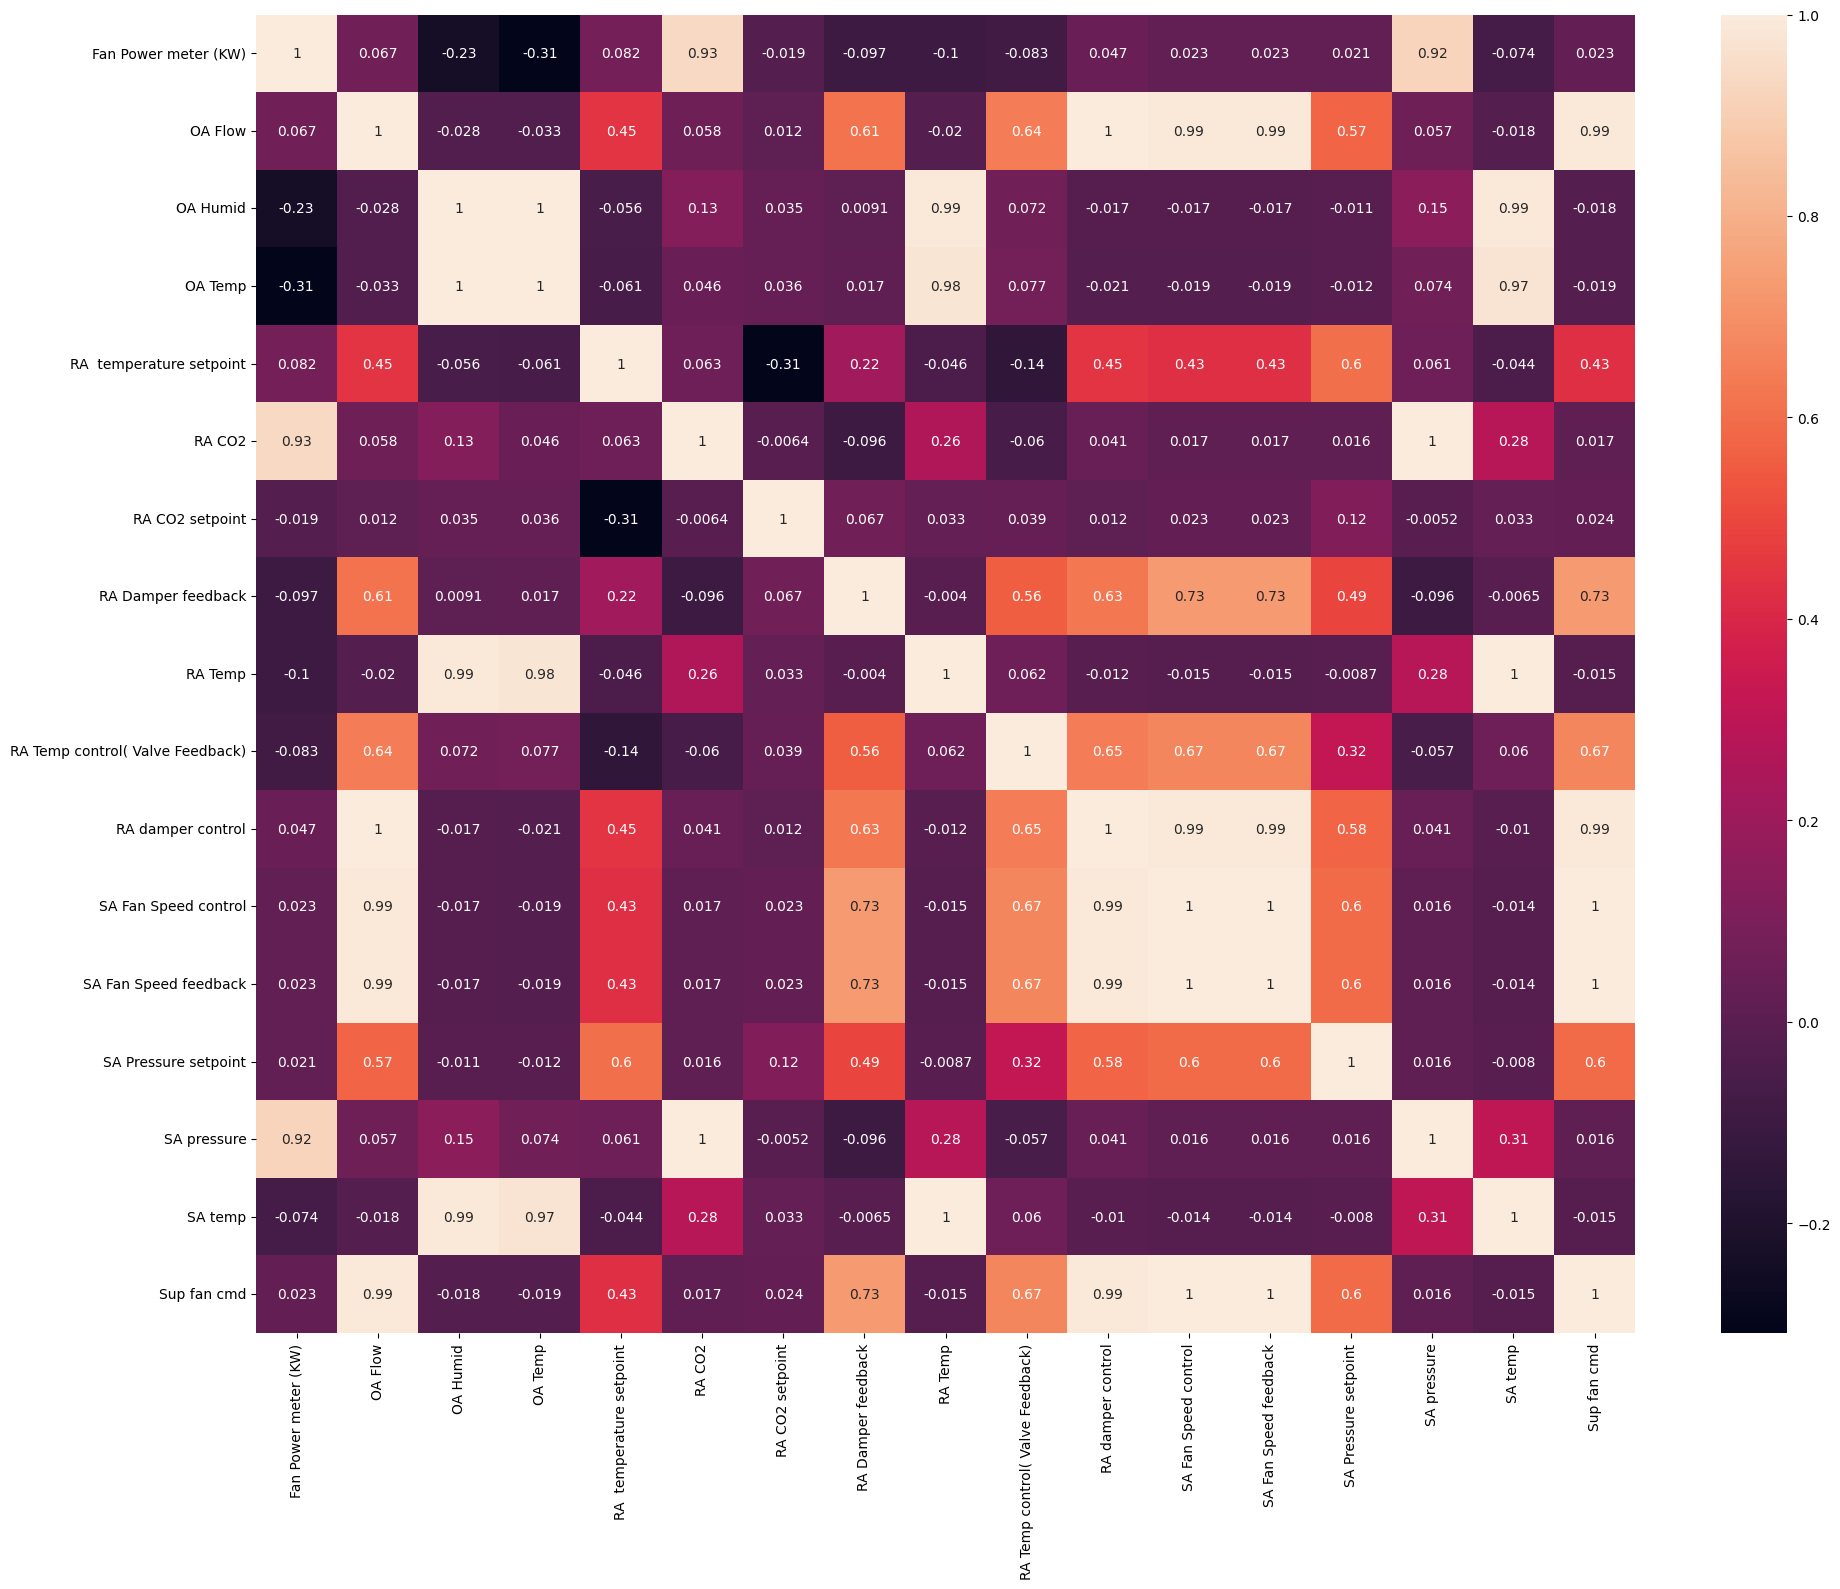

In [48]:
plt.figure(figsize=(20, 16))
sns.heatmap(converted_df.drop(columns="data_received_on_naive").corr(),annot=True)
plt.tight_layout()
plt.show()

In [49]:
target_columns

['RA damper control',
 'RA Temp control( Valve Feedback)',
 'SA Fan Speed control',
 'Fan Power meter (KW)']

In [50]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [51]:
res_RA_damper_control = make_mi_scores(converted_df.drop(columns= ['data_received_on_naive']), converted_df['RA damper control'], discrete_features=False)
res_RA_damper_control

RA damper control                   0.799792
OA Flow                             0.772651
RA Damper feedback                  0.770694
SA Fan Speed control                0.687546
SA Fan Speed feedback               0.686179
Sup fan cmd                         0.684706
RA Temp control( Valve Feedback)    0.571809
RA  temperature setpoint            0.558800
SA Pressure setpoint                0.457403
RA CO2 setpoint                     0.331899
RA CO2                              0.051182
SA pressure                         0.049746
OA Humid                            0.047360
Fan Power meter (KW)                0.046349
RA Temp                             0.043451
OA Temp                             0.042303
SA temp                             0.039946
Name: MI Scores, dtype: float64

In [52]:
converted_df.to_csv('output_ahu_ground_floor_wide_cleaned.csv', index=False)

In [53]:
target_columns

['RA damper control',
 'RA Temp control( Valve Feedback)',
 'SA Fan Speed control',
 'Fan Power meter (KW)']

In [54]:
def analyze_features_for_target(df: pd.DataFrame, target_col: str):
    """
    Calculates and displays Pearson correlation and Mutual Information for a given target column.

    Args:
        df (pd.DataFrame): The input DataFrame.
        target_col (str): The name of the target variable column.
    """
    print(f"\n" + "="*60)
    print(f" FEATURE SELECTION ANALYSIS FOR TARGET: '{target_col}'")
    print("="*60)

    df_copy = df.copy()

    if not pd.api.types.is_numeric_dtype(df_copy[target_col]):
        print(f"Warning: Target column '{target_col}' is not numeric. Skipping.")
        return

    y = df_copy[target_col]
    X = df_copy.drop(columns=[target_col])

    numeric_features = X.select_dtypes(include=np.number)

    correlations = numeric_features.corrwith(y).abs().sort_values(ascending=False)
    correlations.name = 'Pearson_Correlation (abs)'

    numeric_features_imputed = numeric_features.fillna(numeric_features.mean())
    mi_scores = mutual_info_regression(numeric_features_imputed, y)
    mi_series = pd.Series(mi_scores, index=numeric_features_imputed.columns, name='Mutual_Information').sort_values(ascending=False)

    results_df = pd.concat([correlations, mi_series], axis=1).reindex(mi_series.index)
    print("Top 10 Features Ranked by Mutual Information:")
    print(results_df.head(10))
    print()

    fig = plt.figure(figsize=(20, 16))
    gs = fig.add_gridspec(2, 2)
    
    
    ax1 = fig.add_subplot(gs[0, 0])
    results_df['Mutual_Information'].sort_values(ascending=False).plot(kind='barh', ax=ax1, color='skyblue')
    ax1.set_title(f'Top 15 Features by Mutual Information for {target_col}')
    ax1.invert_yaxis()

    ax2 = fig.add_subplot(gs[0, 1])
    results_df['Pearson_Correlation (abs)'].sort_values(ascending=False).plot(kind='barh', ax=ax2, color='salmon')
    ax2.set_title(f'Top 15 Features by Pearson Correlation for {target_col}')
    ax2.invert_yaxis()
    
    
    ax3 = fig.add_subplot(gs[1, :])
    sns.heatmap(converted_df.drop(columns="data_received_on_naive").corr(),annot=True,ax=ax3)

    plt.tight_layout()
    plt.show()

In [55]:
converted_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36071 entries, 0 to 36076
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   data_received_on_naive            36071 non-null  datetime64[ns]
 1   Fan Power meter (KW)              36071 non-null  float64       
 2   OA Flow                           36071 non-null  float64       
 3   OA Humid                          36071 non-null  float64       
 4   OA Temp                           36071 non-null  float64       
 5   RA  temperature setpoint          36071 non-null  float64       
 6   RA CO2                            36071 non-null  float64       
 7   RA CO2 setpoint                   36071 non-null  float64       
 8   RA Damper feedback                36071 non-null  float64       
 9   RA Temp                           36071 non-null  float64       
 10  RA Temp control( Valve Feedback)  36071 non-null  f


 FEATURE SELECTION ANALYSIS FOR TARGET: 'RA damper control'
Top 10 Features Ranked by Mutual Information:
                                  Pearson_Correlation (abs)  \
OA Flow                                            0.995931   
RA Damper feedback                                 0.629810   
SA Fan Speed feedback                              0.988041   
Sup fan cmd                                        0.986610   
SA Fan Speed control                               0.988041   
RA Temp control( Valve Feedback)                   0.647018   
RA  temperature setpoint                           0.445153   
SA Pressure setpoint                               0.575531   
RA CO2 setpoint                                    0.012119   
RA CO2                                             0.041342   

                                  Mutual_Information  
OA Flow                                     0.779742  
RA Damper feedback                          0.765747  
SA Fan Speed feedback             

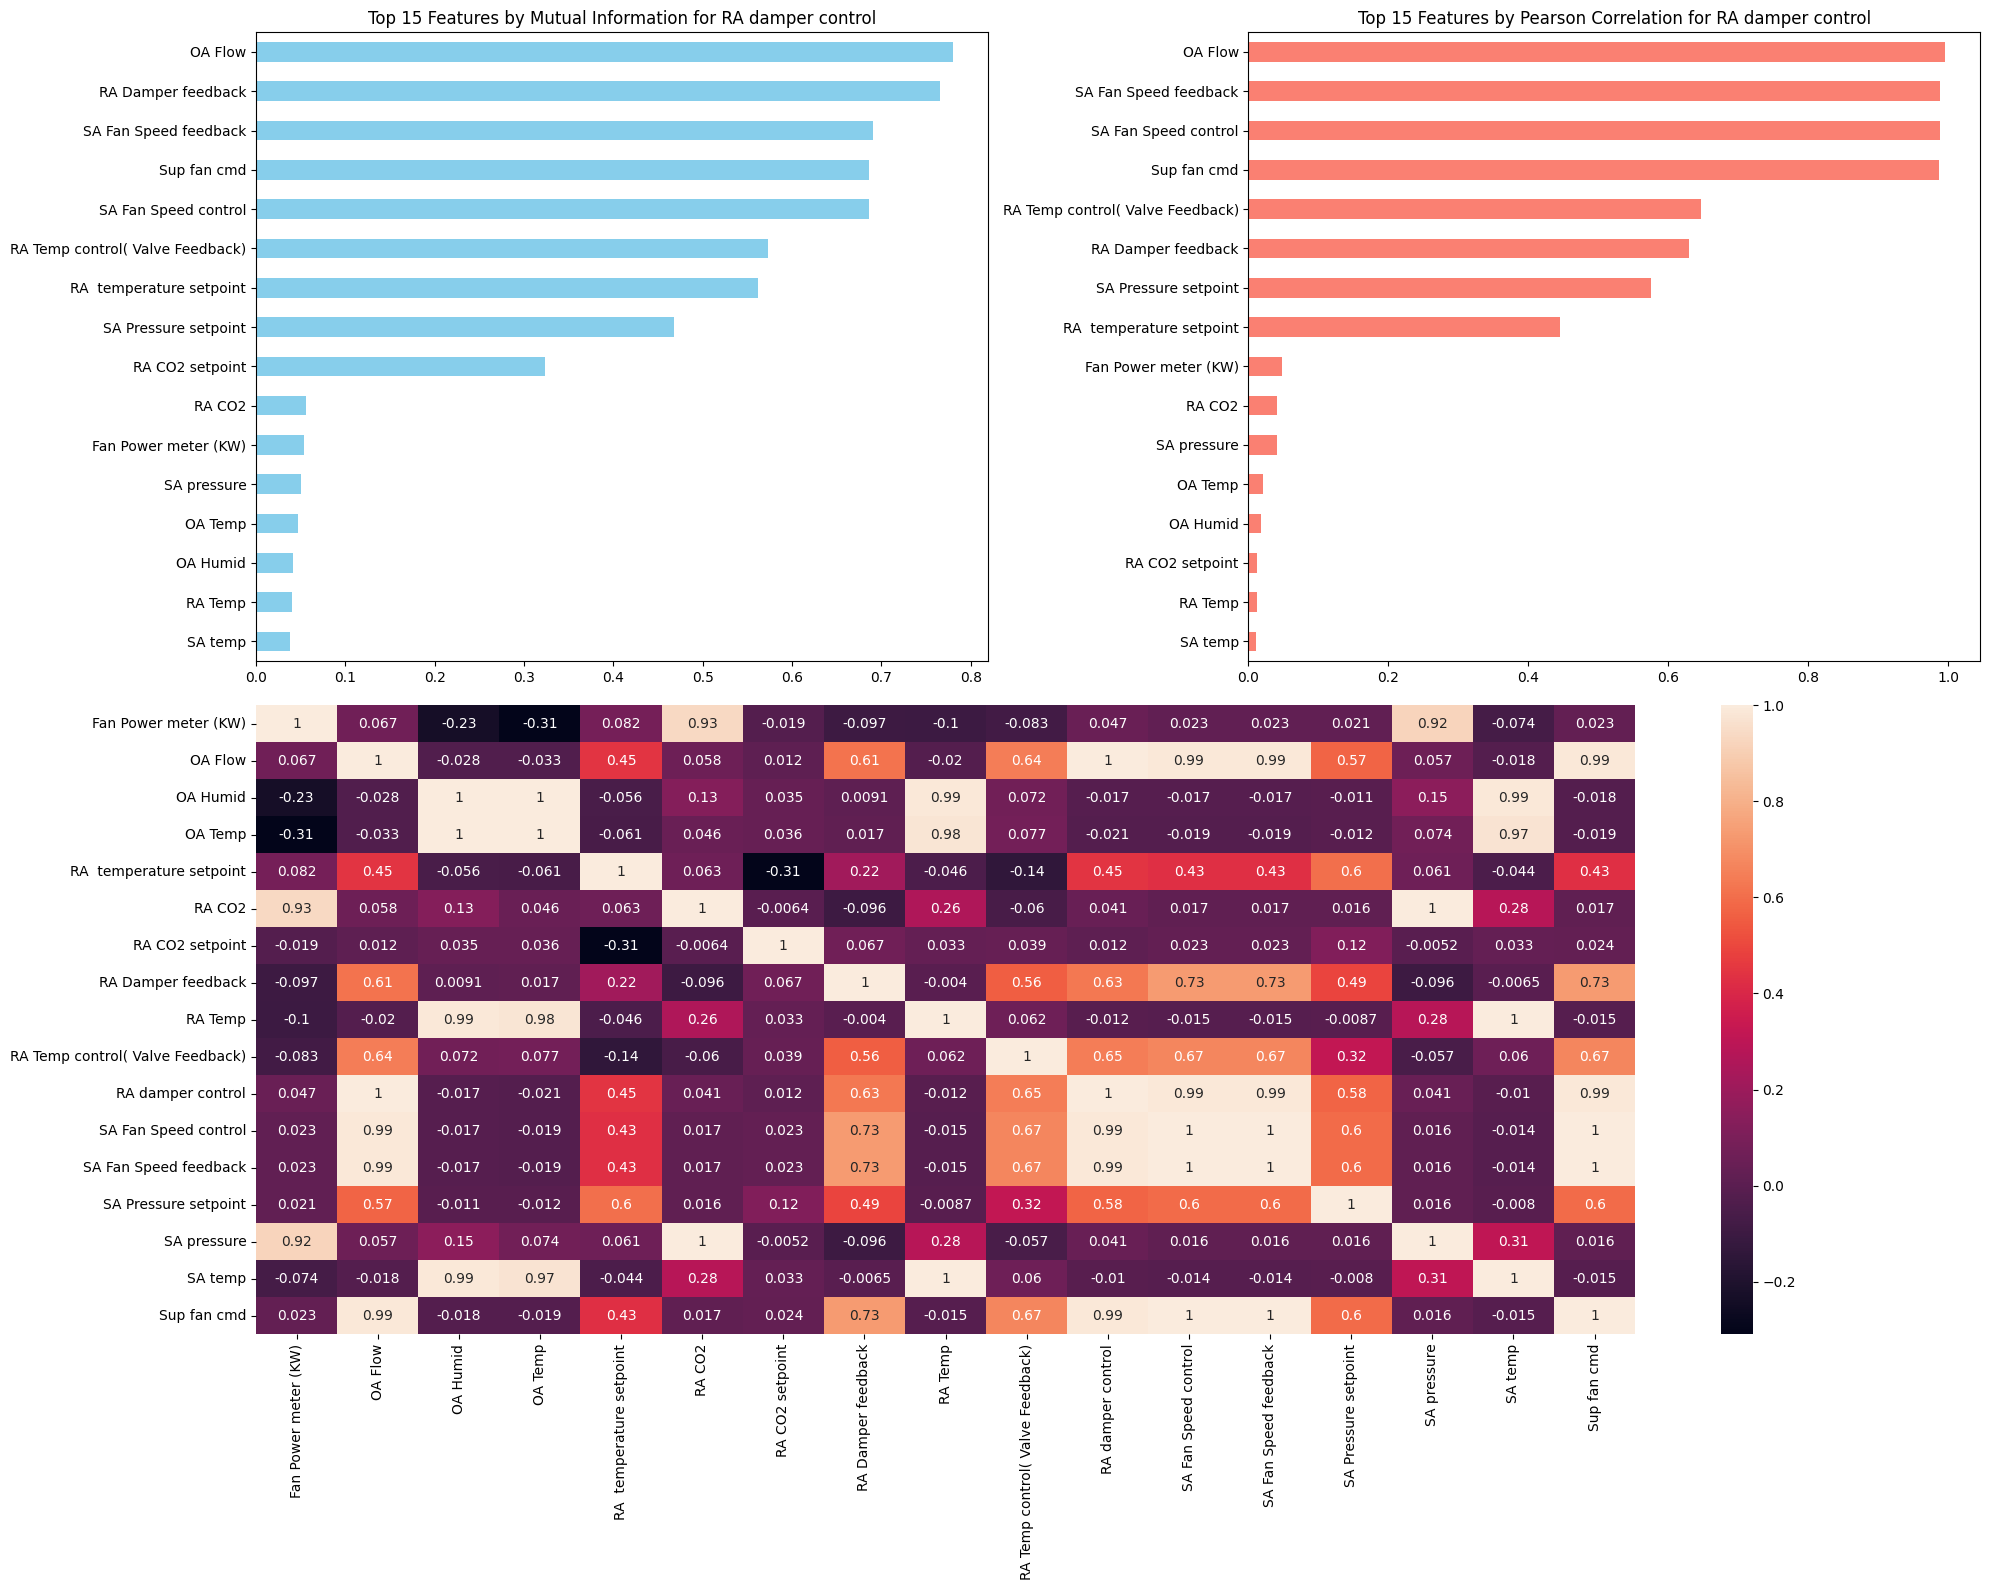

In [56]:
analyze_features_for_target(converted_df, target_col="RA damper control")

In [57]:
df.head(500).to_csv('first_500_rows.csv', index=False)

In [58]:
converted_df.columns

Index(['data_received_on_naive', 'Fan Power meter (KW)', 'OA Flow', 'OA Humid',
       'OA Temp', 'RA  temperature setpoint', 'RA CO2', 'RA CO2 setpoint',
       'RA Damper feedback', 'RA Temp', 'RA Temp control( Valve Feedback)',
       'RA damper control', 'SA Fan Speed control', 'SA Fan Speed feedback',
       'SA Pressure setpoint', 'SA pressure', 'SA temp', 'Sup fan cmd'],
      dtype='object')

In [59]:
x = "Test"
print(f"{x=:-^50}")

x=-----------------------Test-----------------------


In [60]:
def wrapper_function(fun):
    def inner_function(*args, **kwargs):
        print(f"Arguments: {args}, {kwargs}")
        result = fun(*args, **kwargs)
        print(f"Result: {result}")
        return result
    return inner_function


@wrapper_function
def add(a, b):
    return a + b

In [61]:
def mul(a, b):
    return a * b


new_add = wrapper_function(mul)
new_add(3, 4)

Arguments: (3, 4), {}
Result: 12


12

In [62]:
def add(*args):
    print(f"{args=}")
    return sum(args)
    

In [63]:
add(3, 5,7,7,7,6,9,7,5,8,7,9,6,3,4)

args=(3, 5, 7, 7, 7, 6, 9, 7, 5, 8, 7, 9, 6, 3, 4)


93

In [64]:
def identity(name="",roll=0,cls="",coll=""):
    print(f"{name=}, {roll=}, {cls=}, {coll=}")
    

In [65]:
identity(name="Debashis", roll=101, cls="MCA", coll="Aot")

name='Debashis', roll=101, cls='MCA', coll='Aot'


In [66]:
dic = {
    "roll" : 101,
    "name" : "Debashis"
}

identity(**dic)

name='Debashis', roll=101, cls='', coll=''


In [67]:
converted_df.to_csv("converted_data.csv", index=False)

In [ ]:
converted_df.head(100).to_dict("records") 

[{'data_received_on_naive': Timestamp('2025-05-23 12:54:28.494000'),
  'Fan Power meter (KW)': 10.544381141662598,
  'OA Flow': 0.0,
  'OA Humid': 56.90983200073242,
  'OA Temp': 35.93263626098633,
  'RA  temperature setpoint': 25.0,
  'RA CO2': 1474.063720703125,
  'RA CO2 setpoint': 850.0,
  'RA Damper feedback': 0.0,
  'RA Temp': 23.376264572143555,
  'RA Temp control( Valve Feedback)': 0.0,
  'RA damper control': 0.0,
  'SA Fan Speed control': 0.0,
  'SA Fan Speed feedback': 0.0,
  'SA Pressure setpoint': 500.0,
  'SA pressure': 300.8293151855469,
  'SA temp': 16.580490112304688,
  'Sup fan cmd': 0},
 {'data_received_on_naive': Timestamp('2025-05-23 12:57:34.673000'),
  'Fan Power meter (KW)': 10.452616691589355,
  'OA Flow': 0.0,
  'OA Humid': 61.04528427124024,
  'OA Temp': 41.04528427124024,
  'RA  temperature setpoint': 25.0,
  'RA CO2': 1500.0,
  'RA CO2 setpoint': 850.0,
  'RA Damper feedback': 0.0,
  'RA Temp': 24.927051544189453,
  'RA Temp control( Valve Feedback)': 0.0,
 

In [1]:
import requests


In [18]:
x = requests.get("http://google.com/")

In [16]:
import json

In [20]:
response = requests.get("https://api.github.com")

In [27]:
response = requests.get(
    "https://api.github.com/search/repositories",
    params={"q": "language:python", "sort": "stars", "order": "desc"},
)

json_response = response.json()
popular_repositories = json_response["items"]
for repo in popular_repositories[:3]:
    print(f"Name: {repo['name']}")
    print(f"Description: {repo['description']}")
    print(f"Stars: {repo['stargazers_count']}\n")

Name: free-programming-books
Description: :books: Freely available programming books
Stars: 371988

Name: public-apis
Description: A collective list of free APIs
Stars: 367845

Name: system-design-primer
Description: Learn how to design large-scale systems. Prep for the system design interview.  Includes Anki flashcards.
Stars: 322320



In [28]:
import numpy as np

In [47]:
np.random.uniform(500,800,20)

array([507.01704947, 538.92890398, 547.71393605, 687.86418538,
       740.58706574, 784.66066866, 518.98652493, 792.63703416,
       679.36085676, 673.48703828, 561.23933355, 546.04511701,
       604.98569667, 575.31297074, 677.96490545, 604.79846718,
       531.51886639, 777.45714026, 648.06700747, 782.55983073])

In [1]:
import pandas as pd
import numpy as np
import requests
import json

In [ ]:
from typing import List, Union

def get_average_monitoring_data(
    df: pd.DataFrame, 
    resampling_frequency: str, 
    datetime_column: str, 
    monitoring_columns: List[str]
) -> pd.DataFrame:
    """
    Calculates the average of monitoring data over a specified resampling frequency for multiple columns.

    Args:
        df: The input DataFrame.
        resampling_frequency: The frequency string for resampling (e.g., 'D', 'W', 'M').
        datetime_column: The name of the column containing datetime information.
        monitoring_columns: A list of column names to be resampled.

    Returns:
        A DataFrame with the resampled and averaged data.
    """
    return df.set_index(datetime_column)[monitoring_columns].resample(resampling_frequency).mean()

def resample_data_dynamically(
    df: pd.DataFrame,
    datetime_column: str = "data_received_on",
    monitoring_columns: Union[str, List[str]] = "monitoring_data"
) -> pd.DataFrame:
    """
    Cleans, sorts, and dynamically resamples time-series data for one or more columns.

    This function automatically determines the most appropriate resampling frequency 
    (from hourly to yearly) based on the total time span of the data. It handles
    data type conversion, missing values, and sorts the data before resampling.

    Args:
        df: The input DataFrame.
        datetime_column: The name of the datetime column. Defaults to "data_received_on".
        monitoring_columns: A single column name (str) or a list of column names (List[str]) 
                            to resample. Defaults to "monitoring_data".

    Returns:
        A pandas DataFrame containing the resampled data, or an empty DataFrame if an error occurs.
    """
    try:
        df_copy = df.copy()

        if isinstance(monitoring_columns, str):
            monitoring_columns = [monitoring_columns]

        df_copy[datetime_column] = pd.to_datetime(df_copy[datetime_column], errors="coerce")
        for col in monitoring_columns:
            df_copy[col] = pd.to_numeric(df_copy[col], errors="coerce")

        columns_to_check = [datetime_column] + monitoring_columns
        df_copy.dropna(subset=columns_to_check, inplace=True)

        if df_copy.empty:
            return pd.DataFrame()

        df_copy.sort_values(by=datetime_column, ascending=True, inplace=True)

        time_span = df_copy[datetime_column].max() - df_copy[datetime_column].min()

        if time_span < pd.Timedelta(days=2):
            resampling_frequency = "H" 
        elif time_span < pd.Timedelta(weeks=2):
            resampling_frequency = "D" 
        elif time_span < pd.Timedelta(days=100):
            resampling_frequency = "W"  
        elif time_span < pd.Timedelta(days=365 * 2):
            resampling_frequency = "M" 
        elif time_span < pd.Timedelta(days=365 * 5):
            resampling_frequency = "Q"  
        else:
            resampling_frequency = "Y"  

        resampled_data = get_average_monitoring_data(
            df_copy, resampling_frequency, datetime_column, monitoring_columns
        )
        
        resampled_data.dropna(how='all', inplace=True)

    except KeyError as e:
        print(f"Error: Column not found -> {e}")
        return pd.DataFrame()
    except Exception as e:
        print(f"An unexpected error occurred during resampling: {e}")
        return pd.DataFrame()
        
    return resampled_data

In [3]:
import os
ikon_base_url = os.getenv("IKON_BASE_URL")
software_id = os.getenv("SOFTWARE_ID")
str  = f"{ikon_base_url}/rest?inZip=false&outZip=true&inFormat=freejson&outFormat=freejson" \
          f"&service=processRuntimeService&operation=getMyInstancesV2" \
          f"&locale=en_US&activeAccountId={'56b5c266-6a0f-437a-82b9-3715bb6f3d4c'}&softwareId={'b2eac5b8-7e2d-4b9f-9219-8f17c9cf82ed'}&ticket={'e5fe5201-3df6-4f21-b114-eae44050877c'}"
          
str

'https://ikoncloud-dev.keross.com/rest?inZip=false&outZip=true&inFormat=freejson&outFormat=freejson&service=processRuntimeService&operation=getMyInstancesV2&locale=en_US&activeAccountId=56b5c266-6a0f-437a-82b9-3715bb6f3d4c&softwareId=b2eac5b8-7e2d-4b9f-9219-8f17c9cf82ed&ticket=e5fe5201-3df6-4f21-b114-eae44050877c'